# Data Loading, Cleaning and Feature Selection
The following tasks are executed:
- Data is loaded from raw files
- Columnnames are fixed
- Columns get correct object type
- Class columns are put as the last columns
- Missing data is replaced by NaN
- Data characteristics are visualized
- Missing data is visualized
- Data is saved to a new, cleaned file as a df

## Parameters
Here, all parameters of the notebook are set

In [1]:
#Define a config file here to have a static start. If nothing is 
#config_file_path = "config_5dTrend_Training.json"
#config_file_path = "config_LongTrend_Training.json"
config_file_path = "config_LongTrend_Debug_Training.json"
#config_file_path = None

In [2]:
#Default notebook parameters as dict
default_config = dict()
default_config['use_training_settings'] = True
default_config['dataset_name'] = "omxs30_train"
default_config['source_path'] = '01_Source/^OMX_1986-2018.csv'
default_config['class_name'] = "LongTrend"
#Binarize labels
default_config['binarize_labels'] = True
default_config['class_number'] = 1   #Class number in outcomes, which shall be the "1" class
default_config['binary_1_label'] = "Pos. Trend"
default_config['binary_0_label'] = "Neg. Trend"

In [3]:
#Default test notebook parameters as dict
default_test_config = dict()
default_test_config['use_training_settings'] = False
default_test_config['dataset_name'] = "omxs30_test"
default_test_config['source_path'] = '01_Source/^OMX_2018-2020.csv'
default_test_config['class_name'] = "LongTrend"
#Binarize labels
default_test_config['binarize_labels'] = True
default_config['class_number'] = 1   #Class number in outcomes, which shall be the "1" class
default_test_config['binary_1_label'] = "Pos. Trend"
default_test_config['binary_0_label'] = "Neg. Trend"

In [4]:
import joblib
import json

if config_file_path is None:
    #Use file default or set config
    #Use default
    conf = default_config
    #config = default_test_config
    
else:
    #A config path was given
    #Load config from path
    with open(config_file_path, 'r') as fp:
        conf = json.load(fp)
        
    print("Loaded notebook parameters from config file: ", config_file_path)
print("Loaded config: ",json.dumps(conf, indent=2)) 

Loaded notebook parameters from config file:  config_LongTrend_Debug_Training.json
Loaded config:  {
  "dataset_name": "omxs30_debug",
  "use_training_settings": 1,
  "source_path": "01_Source/^OMX_1986-2018.CSV",
  "class_name": "LongTrend",
  "binarize_labels": 1,
  "class_number": 1,
  "binary_1_label": "Pos. Trend",
  "binary_0_label": "Neg. Trend"
}


In [5]:
# Constants for all notebooks in the Machine Learning Toolbox

print("Directories")
training_data_directory = "02_Training_Data"
print("Training data directory: ", training_data_directory)

training_image_save_directory = training_data_directory + '/images'
print("Training data image save directory: ", training_image_save_directory)

test_data_directory = "03_Test_Prepared_Data"
print("Test data directory: ", test_data_directory)

test_image_save_directory = test_data_directory + '/images'
print("Training data image save directory: ", test_image_save_directory)

Directories
Training data directory:  02_Training_Data
Training data image save directory:  02_Training_Data/images
Test data directory:  03_Test_Prepared_Data
Training data image save directory:  03_Test_Prepared_Data/images


In [6]:
#Secondary parameters for training and test settings
#Allow cropping of data, which are longer than moving averages in the future. For training data, this value shall be 
#true to not make false values. For the test values, which do not use any y values, the value shall be false.
#cut_data = conf['use_training_settings']   #If training settings are used, then cut the data. If test settings, do not cut the data
#print("cut_data =", cut_data)

if conf['use_training_settings']==True:
    target_directory = training_data_directory
    image_save_directory = training_image_save_directory
    
    #To save time in the generation of test data and to skip the feature analysis, set this option to false. For training
    #data, set it to false.
    skip_feature_analysis = False
    skip_feature_selection = False
else:
    target_directory = test_data_directory
    image_save_directory = test_image_save_directory
    
    #To save time in the generation of test data and to skip the feature analysis, set this option to false. For training
    #data, set it to true.
    skip_feature_analysis = True
    skip_feature_selection = True

print("Use training settings=", conf['use_training_settings'])
print("target directory=", target_directory)
print("Image save directory=", image_save_directory)
print("Skip feature analysis=", skip_feature_analysis)
print("Skip feature selection", skip_feature_selection)

Use training settings= 1
target directory= 02_Training_Data
Image save directory= 02_Training_Data/images
Skip feature analysis= False
Skip feature selection False


In [7]:
# Generating filenames for saving the files
features_filename = target_directory + "/" + conf['dataset_name'] + "_features" + ".csv"
model_features_filename = target_directory + "/" + conf['dataset_name'] + "_" + conf['class_name'] + "_features_for_model" + ".csv"
outcomes_filename = target_directory + "/" + conf['dataset_name'] + "_outcomes" + ".csv"
model_outcomes_filename = target_directory + "/" + conf['dataset_name'] + "_" + conf['class_name'] + "_outcomes_for_model" + ".csv"
labels_filename = target_directory + "/" + conf['dataset_name'] + "_labels" + ".csv"
source_filename = target_directory + "/" + conf['dataset_name'] + "_source" + ".csv"
#Modified labels
model_labels_filename = target_directory + "/" + conf['dataset_name'] + "_" + conf['class_name'] + "_labels_for_model" + ".csv"
#Columns for feature selection
selected_feature_columns_filename = target_directory + "/" + conf['dataset_name'] + "_" + conf['class_name'] + "_selected_feature_columns.csv"

print("=== Paths ===")
print("Input Features: ", features_filename)
print("Output Features: ", model_features_filename)
print("Input Outcomes: ", outcomes_filename)
print("Output Outcomes: ", model_outcomes_filename)
print("Labels: ", labels_filename)
print("Original source: ", source_filename)
print("Labels for the model: ", model_labels_filename)
print("Selected feature columns: ", selected_feature_columns_filename)

=== Paths ===
Input Features:  02_Training_Data/omxs30_debug_features.csv
Output Features:  02_Training_Data/omxs30_debug_LongTrend_features_for_model.csv
Input Outcomes:  02_Training_Data/omxs30_debug_outcomes.csv
Output Outcomes:  02_Training_Data/omxs30_debug_LongTrend_outcomes_for_model.csv
Labels:  02_Training_Data/omxs30_debug_labels.csv
Original source:  02_Training_Data/omxs30_debug_source.csv
Labels for the model:  02_Training_Data/omxs30_debug_LongTrend_labels_for_model.csv
Selected feature columns:  02_Training_Data/omxs30_debug_LongTrend_selected_feature_columns.csv


## Load dataset

In [8]:
# Import libraries
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.ticker import FuncFormatter, MaxNLocator
import DatavisualizationFunctions as vis
import DataSupportFunctions as sup

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Global settings
np.set_printoptions(precision=3)

#Suppress print out in scientific notiation
np.set_printoptions(suppress=True)

#Load skip cell kernel extension
#Source: https://stackoverflow.com/questions/26494747/simple-way-to-choose-which-cells-to-run-in-ipython-notebook-during-run-all
#%%skip True  #skips cell
#%%skip False #won't skip
#should_skip = True
#%%skip $should_skip
%load_ext skip_kernel_extension

### Load Features and Outcomes

In [9]:
#=== Load Features ===#
features_raw = pd.read_csv(features_filename, sep=';').set_index('id') #Set ID to be the data id
display(features_raw.head(1))

#=== Load Outcomes ===#
outcomes_raw = pd.read_csv(outcomes_filename, sep=';').set_index('id') #Set ID to be the data id
display(outcomes_raw.head(1))

#=== Load Source ===#
source = pd.read_csv(source_filename, sep=';').set_index('id') #Set ID to be the data id
display(source.head(1))

#=== Load Class Labels ===#
#Get classes into a dict from outcomes
#class_labels = dict(zip(outcomes[class_name].unique(), list(range(1,len(outcomes[class_name].unique())+1, 1))))
#print(class_labels)

#Load class labels file
df_y_classes = pd.read_csv(labels_filename, delimiter=';', header=None)
class_labels = sup.inverse_dict(df_y_classes.set_index(df_y_classes.columns[0]).to_dict()[1])
print("Loaded  classes from file", class_labels)

#=== Define classes manually ===#
#class_labels = {
#    0 : 'class1',
#    1 : 'class2'
#}

print(class_labels)

#=== Define index name ===#
#Define name if there is no index name

#df.index.name = 'id'

#=== rename colums ===#
#df.rename(columns={'model.year':'year'}, inplace=True)

#Rename columns with " "
features_raw.columns = [x.replace(" ", "_") for x in features_raw.columns]
features_raw.columns = [x.replace("/", "-") for x in features_raw.columns]

print("Features size : ", features_raw.shape)
display(features_raw.head(5))
print("Outcomes size : ", outcomes_raw.shape)
display(outcomes_raw.head(5))

NormKurs50  NormKurs200  NumberRise50  NumberRise200  MA50Norm  \
id                                                                    
200     0.90625     0.958274          0.52          0.535  -0.04045   

     MA200Norm  MA50NormDiff  MA200NormDiff      RSI_9     RSI_14  RSI9_diff  \
id                                                                             
200  -0.081978     -0.007124      -0.006623  60.979892  61.912329   6.340612   

     RSI14_diff  RSI3sign  
id                         
200    3.869238       0.0

1dTrend  5dTrend  20dTrend  LongTrend
id                                        
200        1        0         1          1

Date    Open    High     Low   Close
id                                             
200  1987-07-23  140.18  141.28  141.28  141.28

Loaded  classes from file {0: 'neutral', 1: 'positive', 2: 'negative'}
{0: 'neutral', 1: 'positive', 2: 'negative'}
Features size :  (750, 13)


NormKurs50  NormKurs200  NumberRise50  NumberRise200  MA50Norm  \
id                                                                    
200    0.906250     0.958274          0.52          0.535 -0.040450   
201    0.926658     0.967357          0.54          0.535 -0.041781   
202    0.945153     0.975589          0.56          0.535 -0.042656   
203    1.000000     1.000000          0.58          0.535 -0.054381   
204    1.000000     1.000000          0.60          0.535 -0.061931   

     MA200Norm  MA50NormDiff  MA200NormDiff      RSI_9     RSI_14  RSI9_diff  \
id                                                                             
200  -0.081978     -0.007124      -0.006623  60.979892  61.912329   6.340612   
201  -0.083499     -0.001331      -0.001521  62.666688  62.976520   1.686796   
202  -0.084821     -0.000875      -0.001322  64.223985  63.954429   1.557297   
203  -0.096757     -0.011725      -0.011935  72.790758  69.766614   8.566772   
204  -0.104996     -0.007551      -0.008239  77.169254  73.114639   4.378496   

     RSI14_diff  RSI3sign  
id                         
200    3.869238       0.0  
201    1.064191       0.0  
202    0.977909       0.0  
203    5.812185       0.0  
204    3.348025       0.0

Outcomes size :  (750, 4)


1dTrend  5dTrend  20dTrend  LongTrend
id                                        
200        1        0         1          1
201        1        0         1          1
202        0        0         1          1
203        0        0         1          1
204        0        0         1          1

### Load Time Series

In [10]:
#Load original data for visualization
import matplotlib.dates as mdates
import datetime

source = pd.read_csv(source_filename, delimiter=';').set_index('id')
source['Date'] = pd.to_datetime(source['Date'])
source['Date'].apply(mdates.date2num)
print("Loaded source time graph={}".format(source.columns))
print("X. Shape={}".format(source.shape))
display(source.head())

Loaded source time graph=Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
X. Shape=(750, 5)


Date    Open    High     Low   Close
id                                            
200 1987-07-23  140.18  141.28  141.28  141.28
201 1987-07-24  141.28  141.60  141.60  141.60
202 1987-07-27  141.60  141.89  141.89  141.89
203 1987-07-28  141.89  143.86  143.86  143.86
204 1987-07-29  143.86  145.28  145.28  145.28

## Data Cleanup of Features and Outcomes before Features are Modified

In [11]:
#Strip all string values to find the missing data
from pandas.api.types import is_string_dtype

for col in features_raw.columns:
    if is_string_dtype(features_raw[col]):
        print("Strip column {}".format(col))
        features_raw[col]=features_raw[col].str.strip()

In [12]:
#Replace values for missing data

#=== Replace all missing values with np.nan
for col in features_raw.columns[0:-1]:
    features_raw[col] = features_raw[col].replace('?', np.nan)
    #df[col] = df[col].replace('unknown', np.nan)
    
print("Missing data in the data frame")
print(sum(features_raw.isna().sum()))

Missing data in the data frame
0


In [13]:
#Get column types
print("Column types:")
print(features_raw.dtypes)
print("\n")

Column types:
NormKurs50       float64
NormKurs200      float64
NumberRise50     float64
NumberRise200    float64
MA50Norm         float64
MA200Norm        float64
MA50NormDiff     float64
MA200NormDiff    float64
RSI_9            float64
RSI_14           float64
RSI9_diff        float64
RSI14_diff       float64
RSI3sign         float64
dtype: object




In [14]:
print("feature columns: {}\n".format(features_raw.columns))
print("Outcome column: {}".format(outcomes_raw[conf['class_name']].name))

feature columns: Index(['NormKurs50', 'NormKurs200', 'NumberRise50', 'NumberRise200',
       'MA50Norm', 'MA200Norm', 'MA50NormDiff', 'MA200NormDiff', 'RSI_9',
       'RSI_14', 'RSI9_diff', 'RSI14_diff', 'RSI3sign'],
      dtype='object')

Outcome column: LongTrend


## Get Feature and Outcome Characteristics

In [15]:
#Show possible classes
print(class_labels)

{0: 'neutral', 1: 'positive', 2: 'negative'}


In [16]:
# Get number of samples
numSamples=features_raw.shape[0]
print("Number of samples={}".format(numSamples))

# Get number of features
numFeatures=features_raw.shape[1]
print("Number of features={}".format(numFeatures))

#Get the number of classes for the supervised learning
numClasses = outcomes_raw[conf['class_name']].value_counts().shape[0]
print("Number of classes={}".format(numClasses))

Number of samples=750
Number of features=13
Number of classes=2


## Analyse and Transform time series

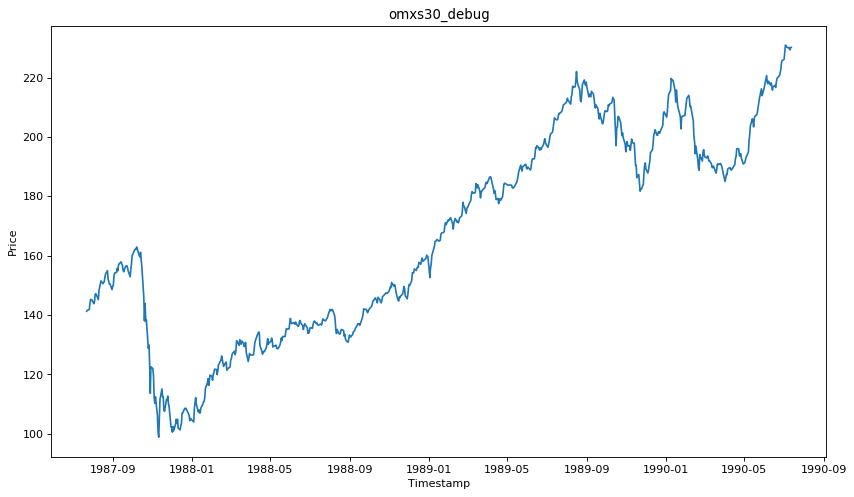

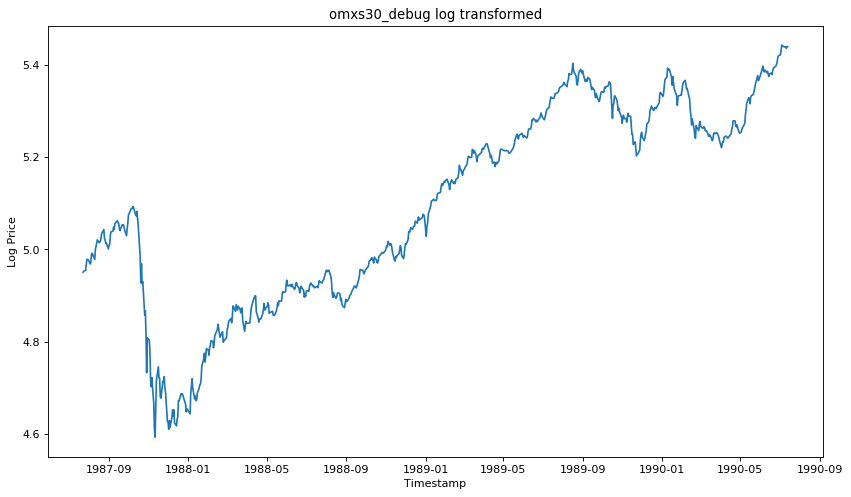

In [17]:
m.rc_file_defaults() #Reset sns

datatitle = conf['dataset_name']

plt.figure(num=None, figsize=(12.5, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(source['Date'],source['Close']) #To get scatter plot, add 'o' as the last parameter
plt.title(datatitle)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.show()

plt.figure(num=None, figsize=(12.5, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(source['Date'],np.log(source['Close']))
plt.title(datatitle + ' log transformed')
plt.xlabel("Timestamp")
plt.ylabel("Log Price")
plt.show()

## Analyse the Features Individually

In [18]:
# Print graphs for all features

def print_characteristics(features_raw, save_graphs=False):
    for i, d in enumerate(features_raw.dtypes):
        if is_string_dtype(d):
            print("Column {} is a categorical string".format(features_raw.columns[i]))
            s = features_raw[features_raw.columns[i]].value_counts()/numSamples
            fig = vis.paintBarChartForCategorical(s.index, s)
        else:
            print("Column {} is a numerical value".format(features_raw.columns[i]))
            fig = vis.paintHistogram(features_raw, features_raw.columns[i])

        plt.figure(fig.number)
        if save_graphs == True:
            plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_{}-{}'.format(i, features_raw.columns[i]), dpi=300)
        plt.show()

Column NormKurs50 is a numerical value
Number of unique features 556 
Number of bins with Freedman und Diaconis:  8
n=750, q25=0.44, q75=0.99, min=0.00, max=1.00, interval length=0.12. Number of intervals=8
Feature characteristics for NormKurs50:
Min value =  0.0
Max value =  1.0
Mean =  0.69
Median = 0.8538556697082568
Standard deviation = 0.3476
Skew = -0.8598
kurtosis = -0.8082


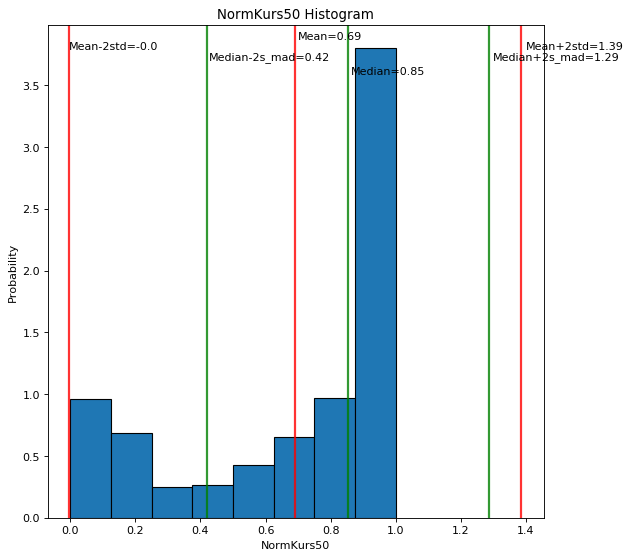

Column NormKurs200 is a numerical value
Number of unique features 620 
Number of bins with Freedman und Diaconis:  9
n=750, q25=0.47, q75=0.98, min=0.00, max=1.00, interval length=0.11. Number of intervals=9
Feature characteristics for NormKurs200:
Min value =  0.0
Max value =  1.0
Mean =  0.7
Median = 0.8173027552705165
Standard deviation = 0.3008
Skew = -0.6452
kurtosis = -0.9538


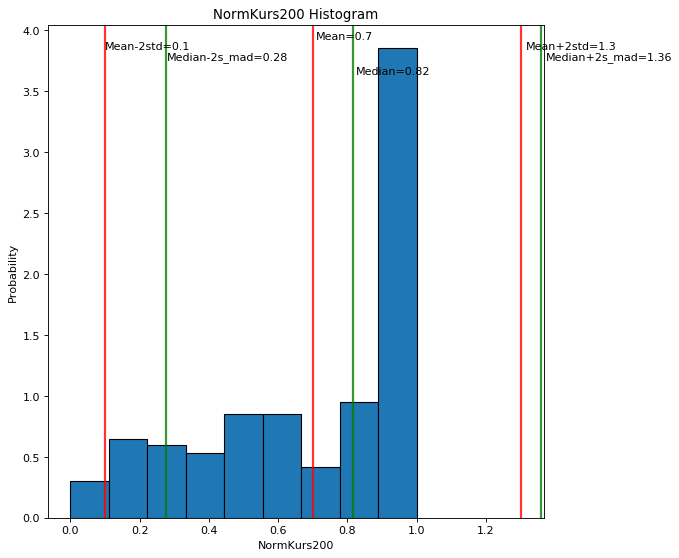

Column NumberRise50 is a numerical value
Number of unique features 22 
Number of bins with Freedman und Diaconis:  16
n=750, q25=0.52, q75=0.64, min=0.34, max=0.76, interval length=0.03. Number of intervals=16
Feature characteristics for NumberRise50:
Min value =  0.34
Max value =  0.76
Mean =  0.57
Median = 0.58
Standard deviation = 0.087
Skew = -0.4602
kurtosis = -0.2954


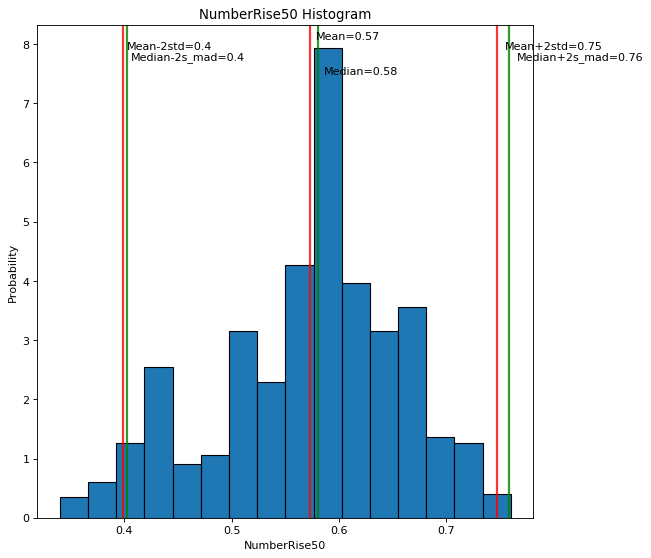

Column NumberRise200 is a numerical value
Number of unique features 29 
Number of bins with Freedman und Diaconis:  11
n=750, q25=0.55, q75=0.60, min=0.50, max=0.64, interval length=0.01. Number of intervals=11
Feature characteristics for NumberRise200:
Min value =  0.5
Max value =  0.64
Mean =  0.57
Median = 0.565
Standard deviation = 0.035
Skew = 0.0921
kurtosis = -1.023


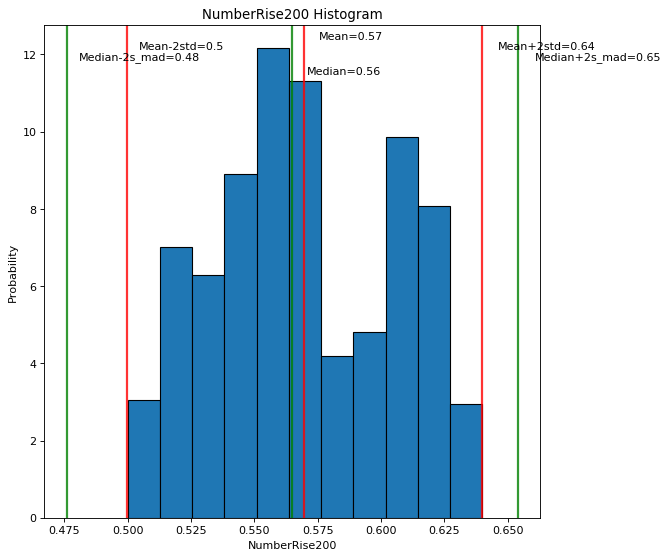

Column MA50Norm is a numerical value
Number of unique features 750 
Number of bins with Freedman und Diaconis:  44
n=750, q25=-0.06, q75=0.00, min=-0.12, max=0.47, interval length=0.01. Number of intervals=44
Feature characteristics for MA50Norm:
Min value =  -0.11780841454718273
Max value =  0.4659761278575767
Mean =  -0.01
Median = -0.032675243268330795
Standard deviation = 0.0796
Skew = 2.5766
kurtosis = 8.3559


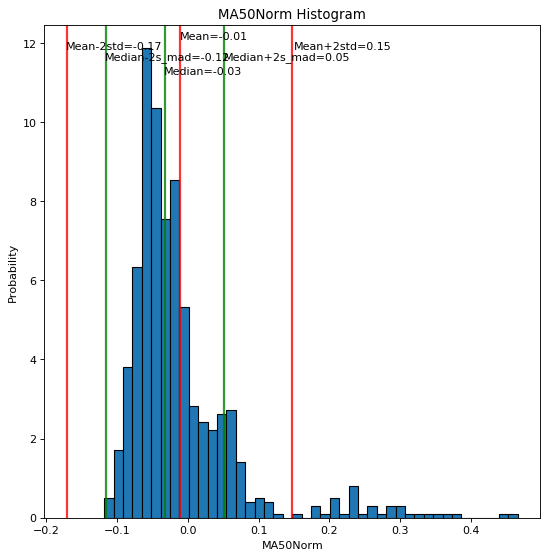

Column MA200Norm is a numerical value
Number of unique features 750 
Number of bins with Freedman und Diaconis:  18
n=750, q25=-0.14, q75=0.01, min=-0.19, max=0.39, interval length=0.03. Number of intervals=18
Feature characteristics for MA200Norm:
Min value =  -0.19436678076022373
Max value =  0.3897506574954475
Mean =  -0.05
Median = -0.07641378853403334
Standard deviation = 0.1173
Skew = 1.4
kurtosis = 1.8052


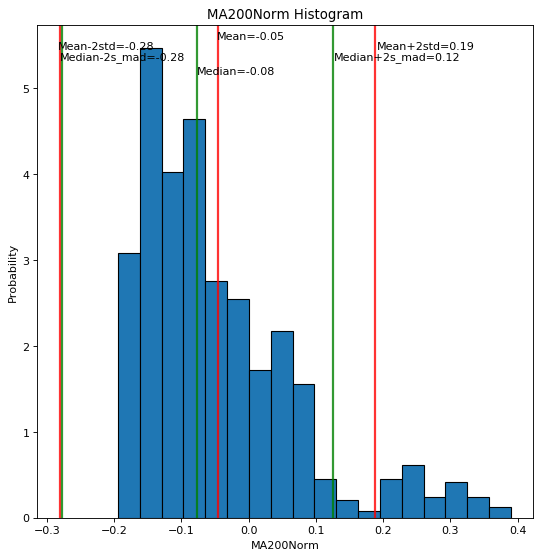

Column MA50NormDiff is a numerical value
Number of unique features 750 
Number of bins with Freedman und Diaconis:  80
n=750, q25=-0.01, q75=0.01, min=-0.10, max=0.10, interval length=0.00. Number of intervals=80
Feature characteristics for MA50NormDiff:
Min value =  -0.1024636358705894
Max value =  0.10059317264052657
Mean =  -0.0
Median = -0.0006922168672541945
Standard deviation = 0.0147
Skew = 0.3977
kurtosis = 15.3243


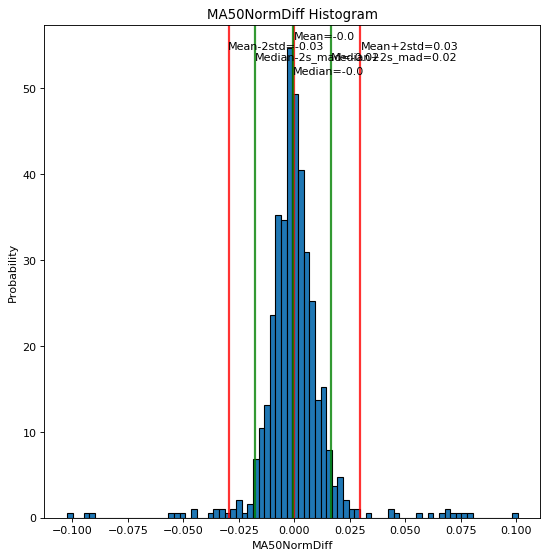

Column MA200NormDiff is a numerical value
Number of unique features 750 
Number of bins with Freedman und Diaconis:  80
n=750, q25=-0.01, q75=0.00, min=-0.09, max=0.10, interval length=0.00. Number of intervals=80
Feature characteristics for MA200NormDiff:
Min value =  -0.0877339862106321
Max value =  0.09680921417991988
Mean =  -0.0
Median = -0.0008566278554383022
Standard deviation = 0.0143
Skew = 0.9555
kurtosis = 13.3408


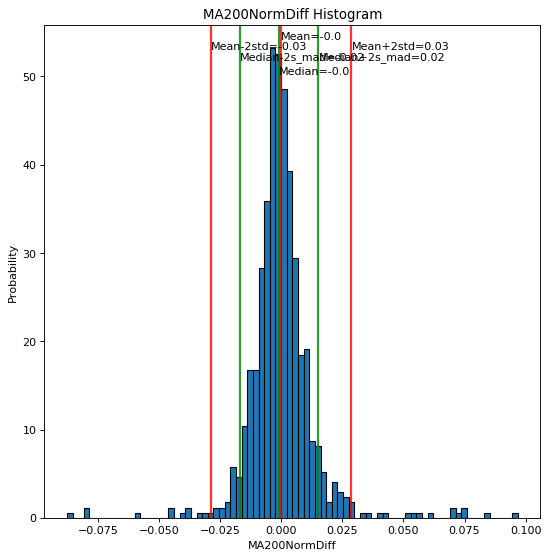

Column RSI_9 is a numerical value
Number of unique features 748 
Number of bins with Freedman und Diaconis:  13
n=750, q25=45.24, q75=72.36, min=14.75, max=91.46, interval length=5.97. Number of intervals=13
Feature characteristics for RSI_9:
Min value =  14.752979029907186
Max value =  91.45959915511428
Mean =  58.71
Median = 61.229482786812106
Standard deviation = 16.7866
Skew = -0.3937
kurtosis = -0.7456


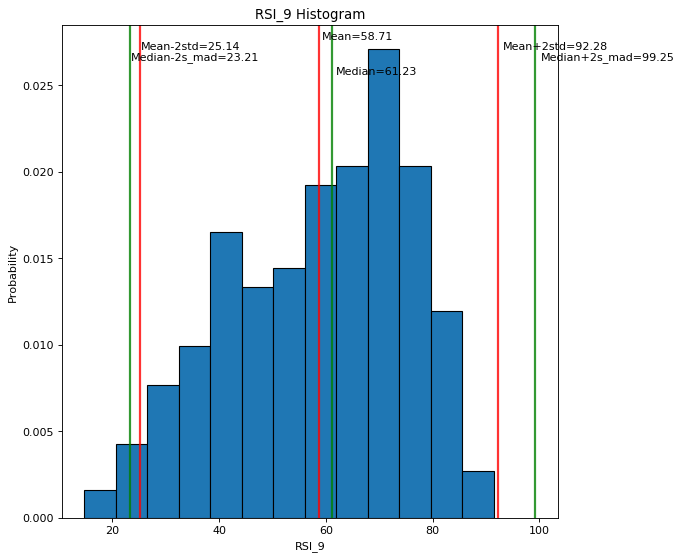

Column RSI_14 is a numerical value
Number of unique features 748 
Number of bins with Freedman und Diaconis:  14
n=750, q25=47.51, q75=69.75, min=18.52, max=86.97, interval length=4.89. Number of intervals=14
Feature characteristics for RSI_14:
Min value =  18.521832064943773
Max value =  86.96660650101394
Mean =  58.06
Median = 60.40488646123495
Standard deviation = 14.4069
Skew = -0.4173
kurtosis = -0.6817


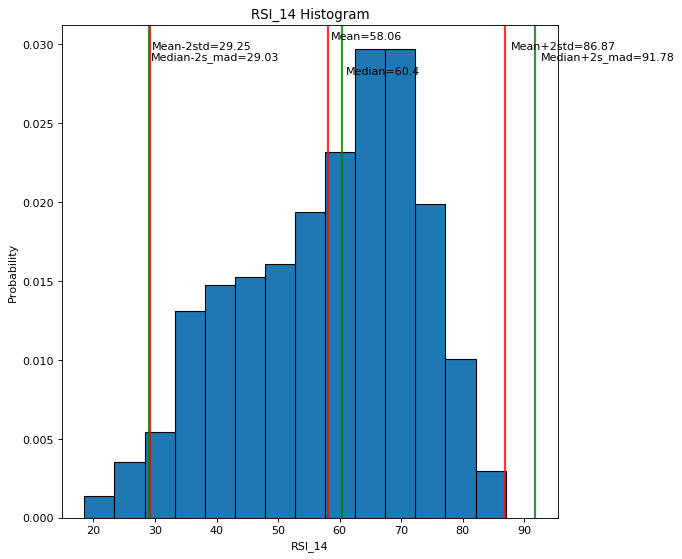

Column RSI9_diff is a numerical value
Number of unique features 750 
Number of bins with Freedman und Diaconis:  36
n=750, q25=-3.41, q75=3.65, min=-38.48, max=17.26, interval length=1.55. Number of intervals=36
Feature characteristics for RSI9_diff:
Min value =  -38.47897371800303
Max value =  17.263472626011573
Mean =  0.03
Median = 0.9335190591132232
Standard deviation = 6.0111
Skew = -1.0265
kurtosis = 4.0505


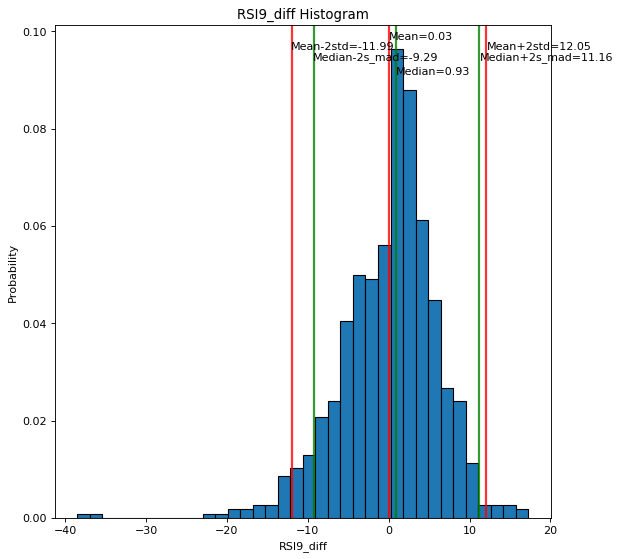

Column RSI14_diff is a numerical value
Number of unique features 749 
Number of bins with Freedman und Diaconis:  39
n=750, q25=-2.23, q75=2.62, min=-28.31, max=12.82, interval length=1.07. Number of intervals=39
Feature characteristics for RSI14_diff:
Min value =  -28.305701236833787
Max value =  12.824603233357319
Mean =  0.02
Median = 0.6385412602950922
Standard deviation = 4.1553
Skew = -1.2061
kurtosis = 5.4194


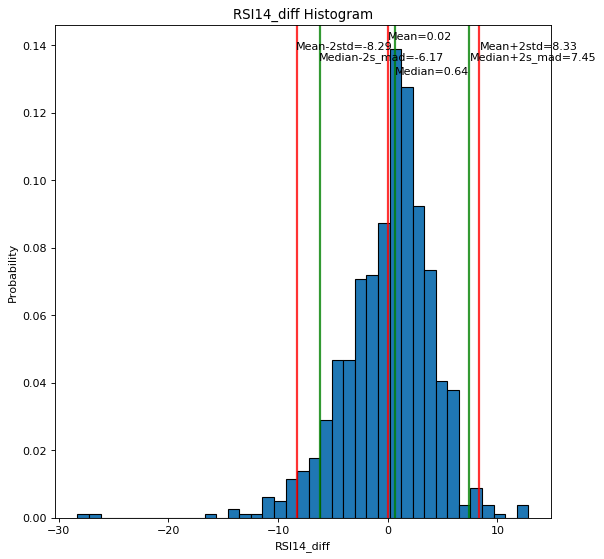

Column RSI3sign is a numerical value
Number of unique features 6 
Number of bins <= 100:  6
n=750, q25=0.00, q75=0.00, min=0.00, max=1.00, interval length=0.00. Number of intervals=6
Feature characteristics for RSI3sign:
Min value =  0.0
Max value =  1.0
Mean =  0.01
Median = 0.0
Standard deviation = 0.0641
Skew = 12.6682
kurtosis = 175.1645


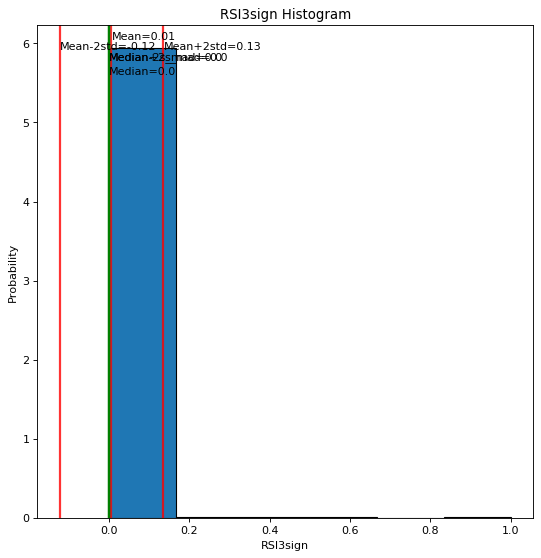

In [19]:
%%skip $skip_feature_analysis
save_graphs = True   #If set true, then all images are saved into the image save directory.

# Print graphs for all features
print_characteristics(features_raw, save_graphs=save_graphs)

Column 1dTrend is a numerical value
Number of unique features 2 
Number of bins <= 100:  2
n=750, q25=0.00, q75=0.00, min=0.00, max=1.00, interval length=0.00. Number of intervals=2
Feature characteristics for 1dTrend:
Min value =  0
Max value =  1
Mean =  0.24
Median = 0.0
Standard deviation = 0.4249
Skew = 1.246
kurtosis = -0.4488


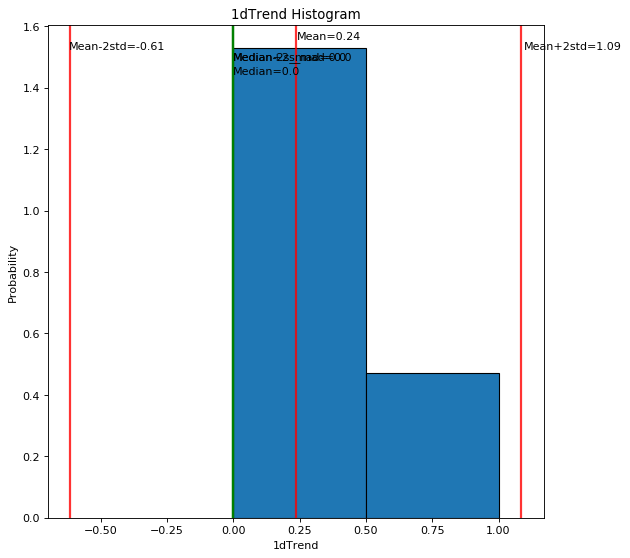

Column 5dTrend is a numerical value
Number of unique features 3 
Number of bins <= 100:  3
n=750, q25=0.00, q75=0.00, min=0.00, max=2.00, interval length=0.00. Number of intervals=3
Feature characteristics for 5dTrend:
Min value =  0
Max value =  2
Mean =  0.24
Median = 0.0
Standard deviation = 0.5799
Skew = 2.2655
kurtosis = 3.7518


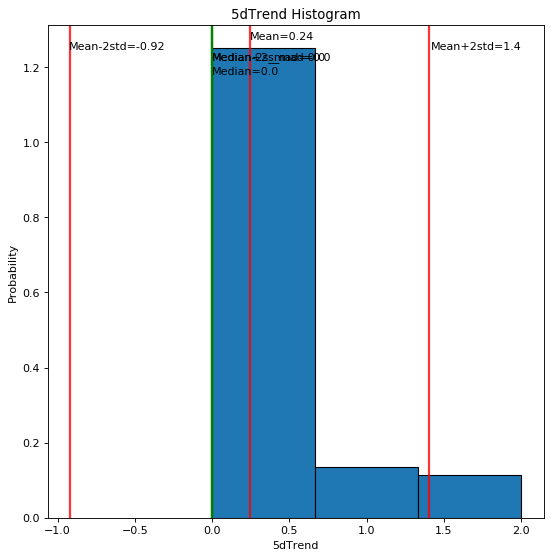

Column 20dTrend is a numerical value
Number of unique features 2 
Number of bins = number of features {}:  2
n=750, q25=0.00, q75=1.00, min=0.00, max=1.00, interval length=0.22. Number of intervals=2
Feature characteristics for 20dTrend:
Min value =  0
Max value =  1
Mean =  0.68
Median = 1.0
Standard deviation = 0.4683
Skew = -0.7536
kurtosis = -1.4359


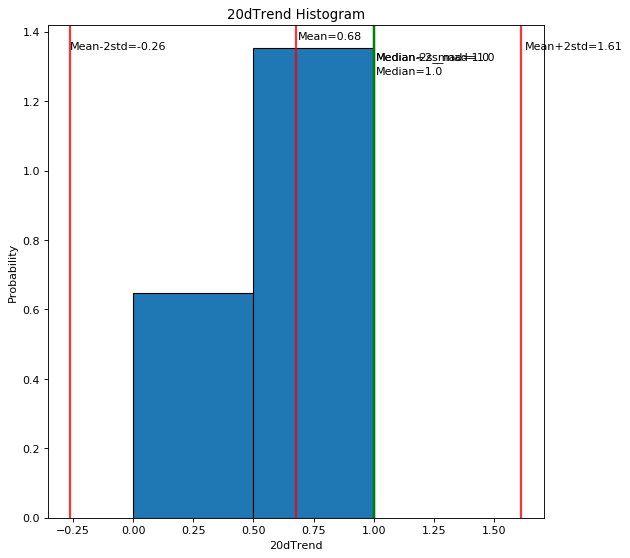

Column LongTrend is a numerical value
Number of unique features 2 
Number of bins = number of features {}:  2
n=750, q25=1.00, q75=2.00, min=1.00, max=2.00, interval length=0.22. Number of intervals=2
Feature characteristics for LongTrend:
Min value =  1
Max value =  2
Mean =  1.28
Median = 1.0
Standard deviation = 0.4499
Skew = 0.9746
kurtosis = -1.053


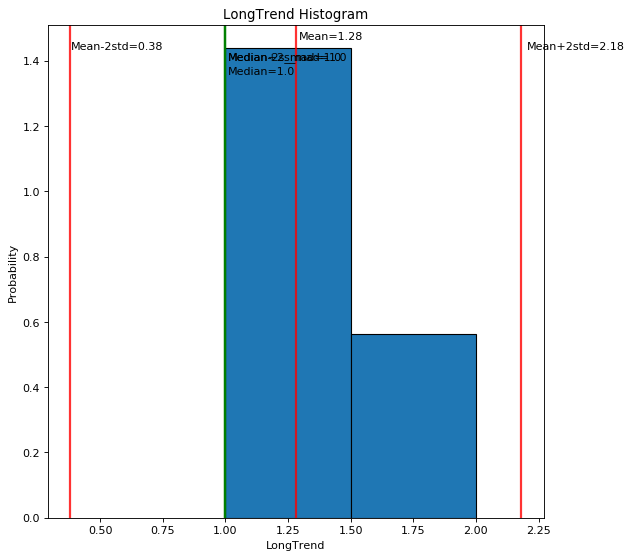

In [20]:
%%skip $skip_feature_analysis
save_graphs = True   #If set true, then all images are saved into the image save directory.

# Print graphs for all features
print_characteristics(outcomes_raw, save_graphs=save_graphs)

In [21]:
#Optional Visualize all numeric values as melted, i.e. visualize the features together

#melted = pd.melt(df, id_vars=[class_Name], value_name="MergedValues")
#melted['MergedValues'].describe()

#%matplotlib inline
#plt.figure(figsize=(12, 4))
#plt.hist(melted['MergedValues'], bins=list(range(0, 500)), log=True)
#plt.xlabel('Value')
#plt.ylabel('Count (log)')
#plt.title("Histogram of Features")
#plt.show()

In [22]:
#Visualize only the class to see if it is skewed
#vis.paintBarChartForCategorical(df[class_Name].value_counts().index, df[class_Name].value_counts())

## Prepare the Feature Columns

In [23]:
#=== Replace signs for missing values or other values with ===#
features = features_raw.copy()

#Custom replacements, replace only if there is something to replace, else it makes NAN of it
#value_replacements = {
#    'n': 0,
#    'y': 1,
#    'unknown': np.NAN
#}

#=== Replace all custom values and missing values with content from the value_replacement
for col in features.columns:
    #df_dig[col] = df[col].map(value_replacements)
    #df_dig[col] = df[col].replace('?', np.nan)
    
    #Everything to numeric
    features[col] = pd.to_numeric(features[col])
    #df_dig[col] = np.int64(df_dig[col])
    
display(features.head(5))

NormKurs50  NormKurs200  NumberRise50  NumberRise200  MA50Norm  \
id                                                                    
200    0.906250     0.958274          0.52          0.535 -0.040450   
201    0.926658     0.967357          0.54          0.535 -0.041781   
202    0.945153     0.975589          0.56          0.535 -0.042656   
203    1.000000     1.000000          0.58          0.535 -0.054381   
204    1.000000     1.000000          0.60          0.535 -0.061931   

     MA200Norm  MA50NormDiff  MA200NormDiff      RSI_9     RSI_14  RSI9_diff  \
id                                                                             
200  -0.081978     -0.007124      -0.006623  60.979892  61.912329   6.340612   
201  -0.083499     -0.001331      -0.001521  62.666688  62.976520   1.686796   
202  -0.084821     -0.000875      -0.001322  64.223985  63.954429   1.557297   
203  -0.096757     -0.011725      -0.011935  72.790758  69.766614   8.566772   
204  -0.104996     -0.007551      -0.008239  77.169254  73.114639   4.378496   

     RSI14_diff  RSI3sign  
id                         
200    3.869238       0.0  
201    1.064191       0.0  
202    0.977909       0.0  
203    5.812185       0.0  
204    3.348025       0.0

In [24]:
#Create one-hot-encoding for certain classes and replace the original class
#onehotlabels = pd.get_dummies(df_dig.iloc[:,1])

#Add one-hot-encondig columns to the dataset
#for i, name in enumerate(onehotlabels.columns):
#    df_dig.insert(i+1, column='Cylinder' + str(name), value=onehotlabels.loc[:,name])

#Remove the original columns
#df_dig.drop(columns=['cylinders'], inplace=True)

## Prepare the Outcomes

In [25]:
# Replace classes with digital values
outcomes = outcomes_raw.copy()
outcomes = outcomes.astype(int)
print("Outcome types")
print(outcomes.dtypes)

Outcome types
1dTrend      int32
5dTrend      int32
20dTrend     int32
LongTrend    int32
dtype: object


### Binarize Multiclass Dataset

In [26]:
#If the binaryize setting is used, then binarize the class of the outcome.
if conf['binarize_labels']==True:
    binarized_outcome = (outcomes[conf['class_name']] == conf['class_number']).astype(np.int_)
    y = binarized_outcome.values.flatten()
    print("y was binarized. Classes before: {}. Classes after: {}".format(np.unique(outcomes[conf['class_name']]), np.unique(y)))
    
    #Redefine class labels
    class_labels = {
        0 : conf['binary_0_label'],
        1 : conf['binary_1_label']
    }
    
    print("Class labels redefined to: {}".format(class_labels))
else:
    y = outcomes[conf['class_name']].values.flatten()
    print("No binarization was made. Classes: {}".format(np.unique(y)))

y was binarized. Classes before: [1 2]. Classes after: [0 1]
Class labels redefined to: {0: 'Neg. Trend', 1: 'Pos. Trend'}


In [27]:
#y = outcomes[class_name].values.flatten()
#y_labels = class_labels
#class_labels_inverse = sup.inverse_dict(class_labels)

print("y shape: {}".format(y.shape))
print("y labels: {}".format(class_labels))
print("y unique classes: {}".format(np.unique(y, axis=0)))

y shape: (750,)
y labels: {0: 'Neg. Trend', 1: 'Pos. Trend'}
y unique classes: [0 1]


## Determine Missing Data
Missing data is only visualized here as it is handled in the training algorithm in S40.

In [28]:
# Check if there are any nulls in the data
print("Missing data in the features: ", features.isnull().values.sum())
features[features.isna().any(axis=1)]

Missing data in the features:  0


Empty DataFrame
Columns: [NormKurs50, NormKurs200, NumberRise50, NumberRise200, MA50Norm, MA200Norm, MA50NormDiff, MA200NormDiff, RSI_9, RSI_14, RSI9_diff, RSI14_diff, RSI3sign]
Index: []

Number of missing values per feature


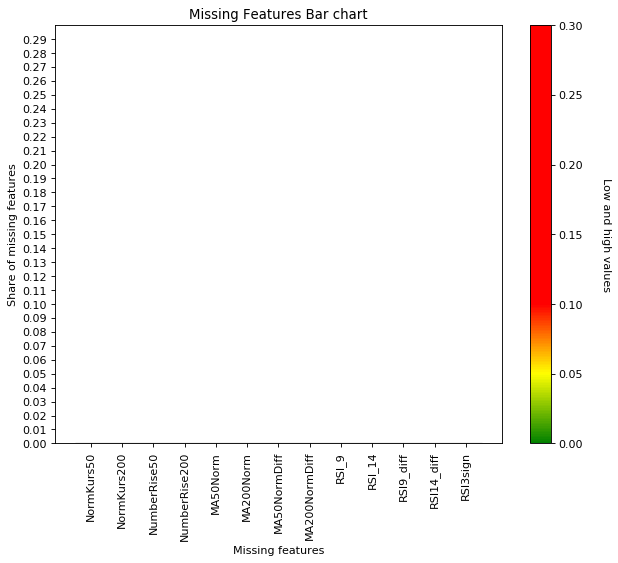

In [29]:
#Missing data part
print("Number of missing values per feature")
missingValueShare = []
for col in features.columns:
    #if is_string_dtype(df_dig[col]):
    missingValueShare.append(sum(features[col].isna())/numSamples)

#Print missing value graph
vis.paintBarChartForMissingValues(features.columns, missingValueShare)

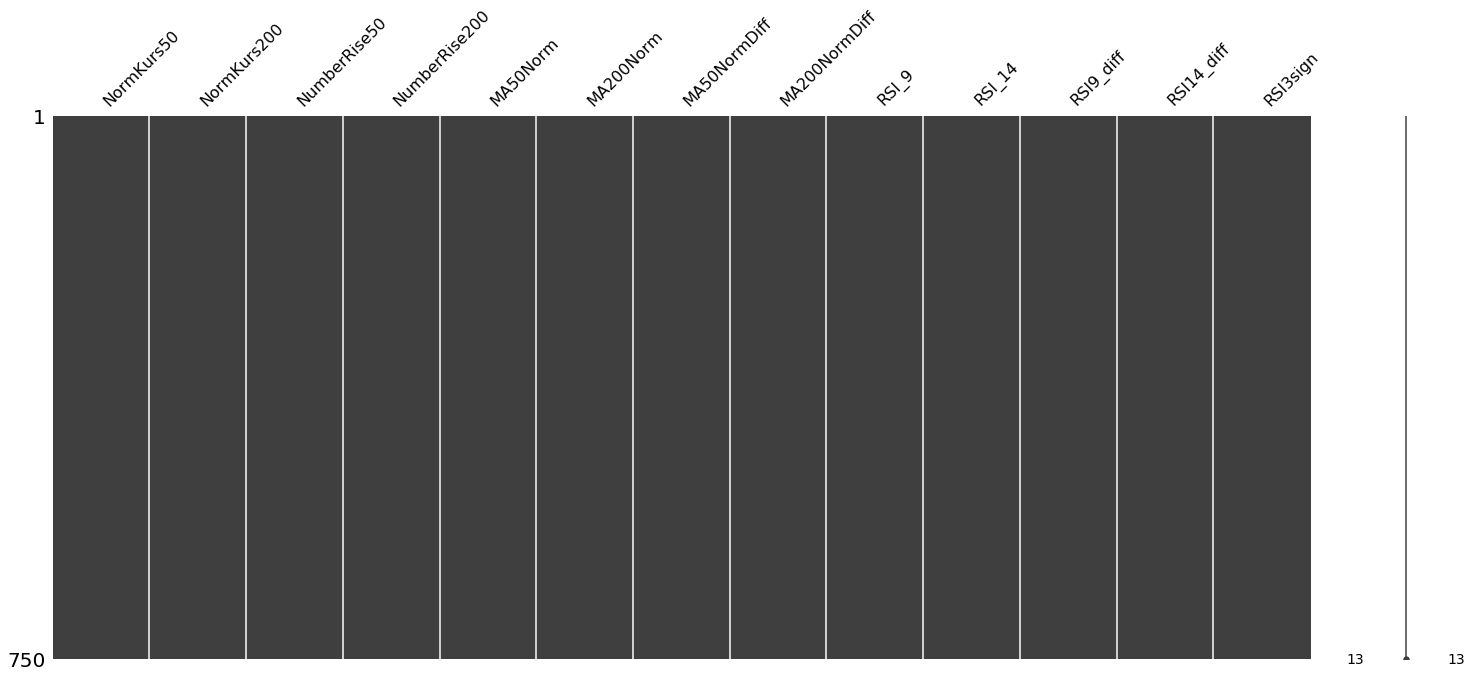

In [30]:
#Visualize missing data with missingno
import missingno as msno
%matplotlib inline
msno.matrix(features)

In [31]:
if features.isnull().values.sum()>0:
    msno.heatmap(features)

#### View Prepared Binary Features

We need some more plots for the binary data types.

In [32]:
#vis.plotBinaryValues(df_dig, df_dig.columns) #0:-1
#plt.savefig(image_save_directory + "/BinaryFeatures.png", dpi=70)

## Feature Visualization

### Auto Correlations of Time Dependent Variables

Source: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

#### Autoregression Intuition

Consider a time series that was generated by an autoregression (AR) process with a lag of k. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened. We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

#### Moving Average Intuition

Consider a time series that was generated by a moving average (MA) process with a lag of k. Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated. For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

if the autocorrelation function has a very long tail, then it is no stationary process

Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.


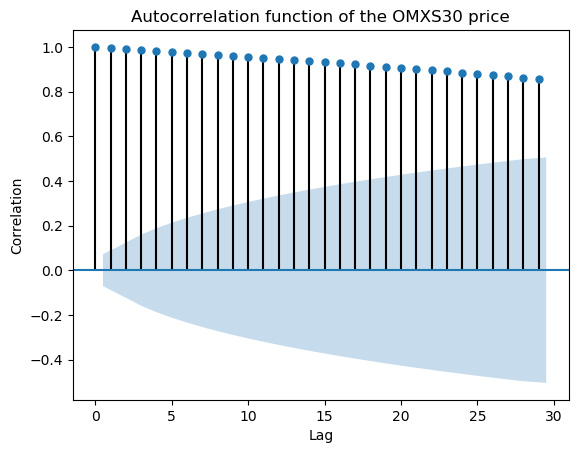

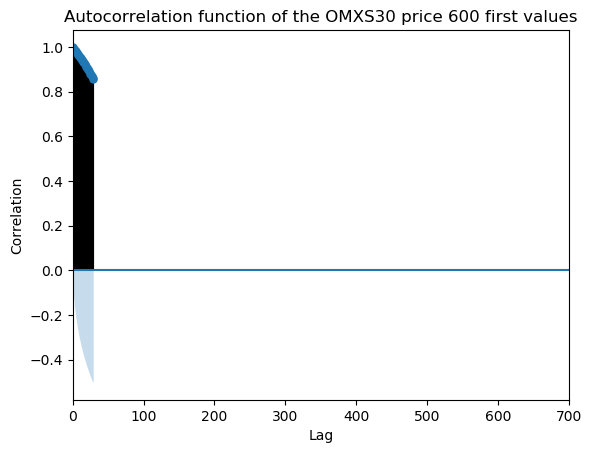

Ljung-Box statistics: p-value= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
If p values > 0.05 then there are significant autocorrelations.


C:\Users\wendt.ICT\.conda\envs\env_ml\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


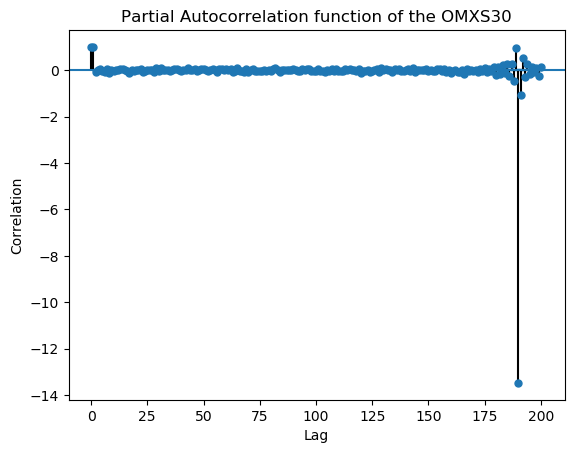

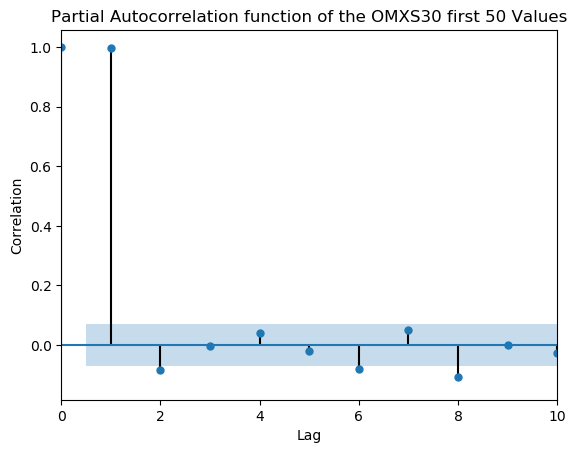

In [33]:
%%skip $skip_feature_analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

m.rc_file_defaults() #Reset sns

#Here, the time graph is selected
print("Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. "+
      "The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.")
plot_acf(np.log(source['Close']))
plt.title("Autocorrelation function of the OMXS30 price")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

plot_acf(np.log(source['Close']))
plt.title("Autocorrelation function of the OMXS30 price 600 first values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,700])
plt.show()

print("Ljung-Box statistics: p-value=", acorr_ljungbox(np.log(source['Close']), lags=None, boxpierce="Ljung-Box")[1])
print("If p values > 0.05 then there are significant autocorrelations.")

plot_pacf(np.log(source['Close']), lags=200)
plt.title("Partial Autocorrelation function of the OMXS30")
plt.xlabel("Lag")
plt.ylabel("Correlation")
#plt.xlim([0,700])
plt.show()

plot_pacf(np.log(source['Close']), lags=50)
plt.title("Partial Autocorrelation function of the OMXS30 first 50 Values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,10])
plt.show()

Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.


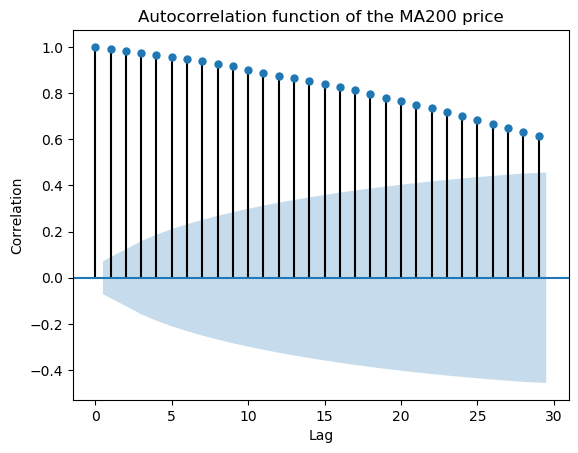

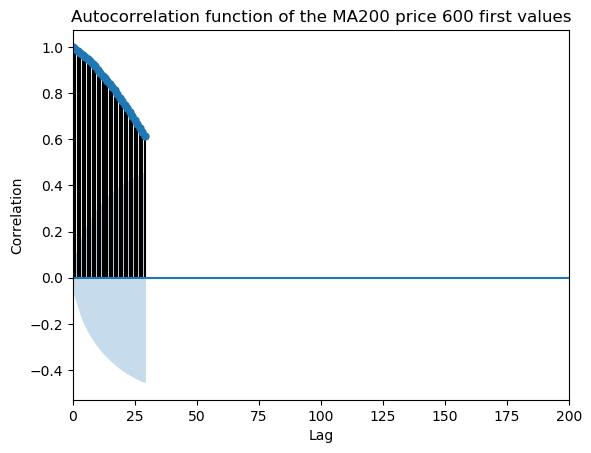

Ljung-Box statistics: p-value= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
If p values > 0.05 then there are significant autocorrelations.


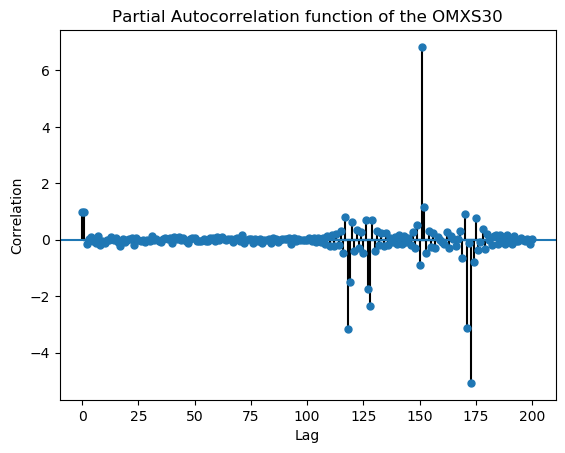

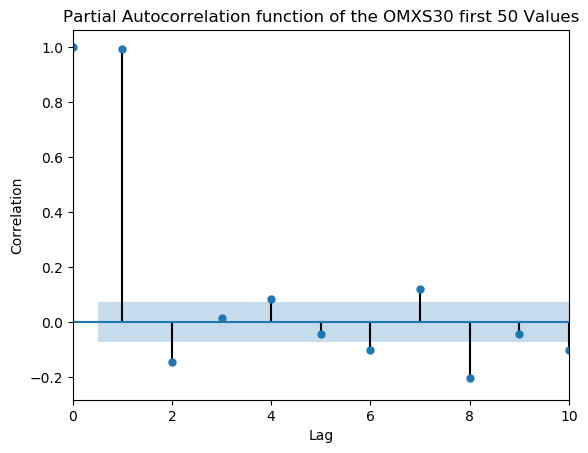

In [34]:
%%skip $skip_feature_analysis
#Here, the time graph is selected
print("Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. "+
      "The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.")
plot_acf(features.MA200Norm)
plt.title("Autocorrelation function of the MA200 price")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

plot_acf(features.MA200Norm)
plt.title("Autocorrelation function of the MA200 price 600 first values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,200])
plt.show()

print("Ljung-Box statistics: p-value=", acorr_ljungbox(features.MA200Norm, lags=None, boxpierce="Ljung-Box")[1])
print("If p values > 0.05 then there are significant autocorrelations.")

plot_pacf(features.MA200Norm, lags=200)
plt.title("Partial Autocorrelation function of the OMXS30")
plt.xlabel("Lag")
plt.ylabel("Correlation")
#plt.xlim([0,700])
plt.show()

plot_pacf(features.MA200Norm, lags=50)
plt.title("Partial Autocorrelation function of the OMXS30 first 50 Values")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,10])
plt.show()

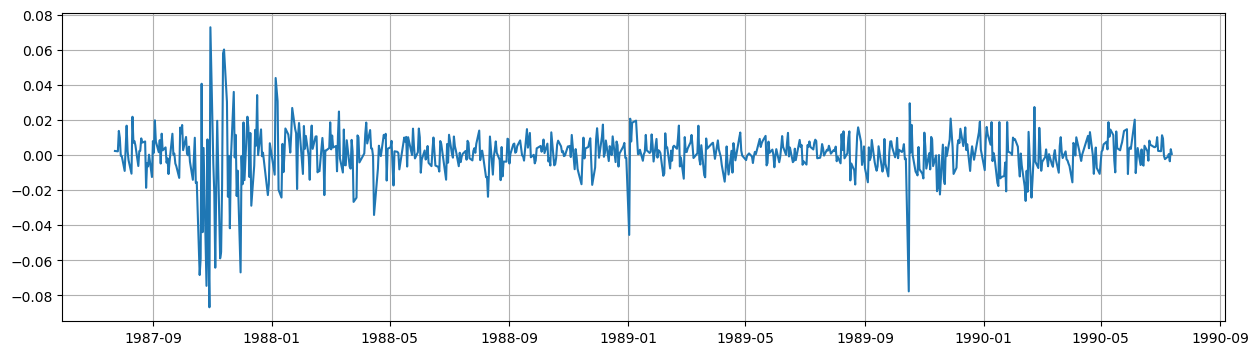

In [35]:
%%skip $skip_feature_analysis
#Plot difference between time values to see if the differences are stationary
diff = pd.DataFrame(data=np.divide(source['Close'] - source['Close'].shift(1), source['Close'])).set_index(source['Date'])
diff=diff.iloc[1:,:]
fig = plt.figure(figsize= (15, 4))
plt.plot(source['Date'].iloc[1:], diff)
plt.grid()

Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.


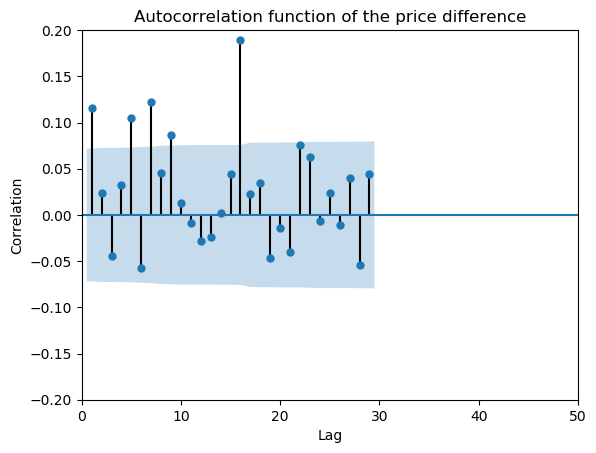

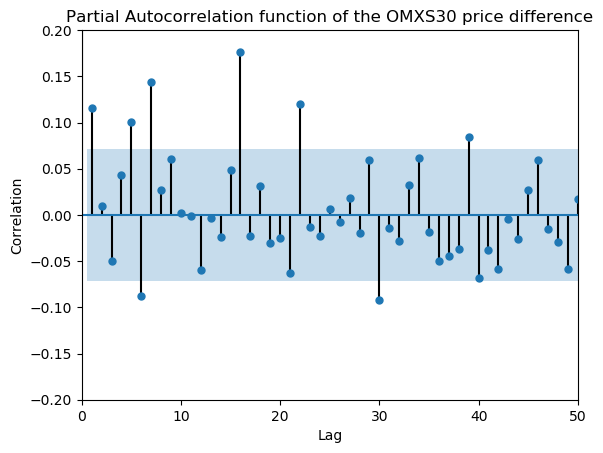

Ljung-Box statistics: p-value= [0.002 0.006 0.008 0.013 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
If p values > 0.05 then there are significant autocorrelations.


In [36]:
%%skip $skip_feature_analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

#Here, the time graph is selected
print("Plot the total autocorrelation of the price. The dark blue values are the correlation of the price with the lag. "+
      "The light blue cone is the confidence interval. If the correlation is > cone, the value is significant.")

plot_acf(diff)
plt.title("Autocorrelation function of the price difference")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.ylim([-0.2, 0.2])
plt.xlim([0,50])
plt.show()

plot_pacf(diff, lags=100)
plt.title("Partial Autocorrelation function of the OMXS30 price difference")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xlim([0,50])
plt.ylim([-0.2, 0.2])
plt.show()

print("Ljung-Box statistics: p-value=", acorr_ljungbox(diff, lags=None, boxpierce="Ljung-Box")[1])
print("If p values > 0.05 then there are significant autocorrelations.")

# Feature Visualization
Here, feature selection and visulization of datasets is performed
Methods
- Feature visualization through t-SNE
- Feature visualization and analysis through PCA

### Standardize Data for Feature Selection and Visualization
Z-Normalize the data around zero and divided by standard deviation. Fit the normalizer on the training data and transform the training and the test data. The reason is that the scaler only must depend on the training data, in order to prevent leakage of information from the test data.

In [37]:
from sklearn import preprocessing

#=== Select the best type of scaler ===#
scaler = preprocessing.StandardScaler() #Because normal distribution. Don't use minmax scaler for PCA or unsupervised learning
# as the axis shall be centered and not shifted.


scaler.fit(features)
#Use this scaler also for the test data at the end
X_scaled = pd.DataFrame(data=scaler.transform(features), index = features.index, columns=features.columns)
print("Unscaled values")
display(features.iloc[0:2,:])
print("Scaled values")
display(X_scaled.iloc[0:2,:])

scaler.fit(y.reshape(-1, 1))
y_scaled = pd.DataFrame(data=scaler.transform(y.reshape(-1, 1)), index = features.index, columns=[conf['class_name']])
print("Unscaled values")
display(y[0:10])
print("Scaled values")
display(y_scaled.iloc[0:10,:])

Unscaled values


NormKurs50  NormKurs200  NumberRise50  NumberRise200  MA50Norm  \
id                                                                    
200    0.906250     0.958274          0.52          0.535 -0.040450   
201    0.926658     0.967357          0.54          0.535 -0.041781   

     MA200Norm  MA50NormDiff  MA200NormDiff      RSI_9     RSI_14  RSI9_diff  \
id                                                                             
200  -0.081978     -0.007124      -0.006623  60.979892  61.912329   6.340612   
201  -0.083499     -0.001331      -0.001521  62.666688  62.976520   1.686796   

     RSI14_diff  RSI3sign  
id                         
200    3.869238       0.0  
201    1.064191       0.0

Scaled values


NormKurs50  NormKurs200  NumberRise50  NumberRise200  MA50Norm  \
id                                                                    
200    0.618819     0.855354     -0.606637      -0.989094 -0.365114   
201    0.677575     0.885575     -0.376618      -0.989094 -0.381852   

     MA200Norm  MA50NormDiff  MA200NormDiff     RSI_9    RSI_14  RSI9_diff  \
id                                                                           
200  -0.304768     -0.480491      -0.459340  0.135274  0.267603   1.050638   
201  -0.317749     -0.087414      -0.102424  0.235826  0.341519   0.275921   

     RSI14_diff  RSI3sign  
id                         
200    0.925982  -0.09599  
201    0.250471  -0.09599

Unscaled values


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Scaled values


LongTrend
id            
200   0.625672
201   0.625672
202   0.625672
203   0.625672
204   0.625672
205   0.625672
206   0.625672
207   0.625672
208   0.625672
209   0.625672

### Feature and Outcomes Correlation Matrix

In [38]:
total_values = X_scaled.join(y_scaled)
print("Merged features and outcomes to use in correlation matrix")

Merged features and outcomes to use in correlation matrix


In [39]:
#Select column values to use in the correlation plot
feature_plot=list(range(0,10,1))
#Select outcomes to show
feature_plot.extend([-4, -3, -2, -1])

print(feature_plot)
print(total_values.columns[feature_plot])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -4, -3, -2, -1]
Index(['NormKurs50', 'NormKurs200', 'NumberRise50', 'NumberRise200',
       'MA50Norm', 'MA200Norm', 'MA50NormDiff', 'MA200NormDiff', 'RSI_9',
       'RSI_14', 'RSI9_diff', 'RSI14_diff', 'RSI3sign', 'LongTrend'],
      dtype='object')


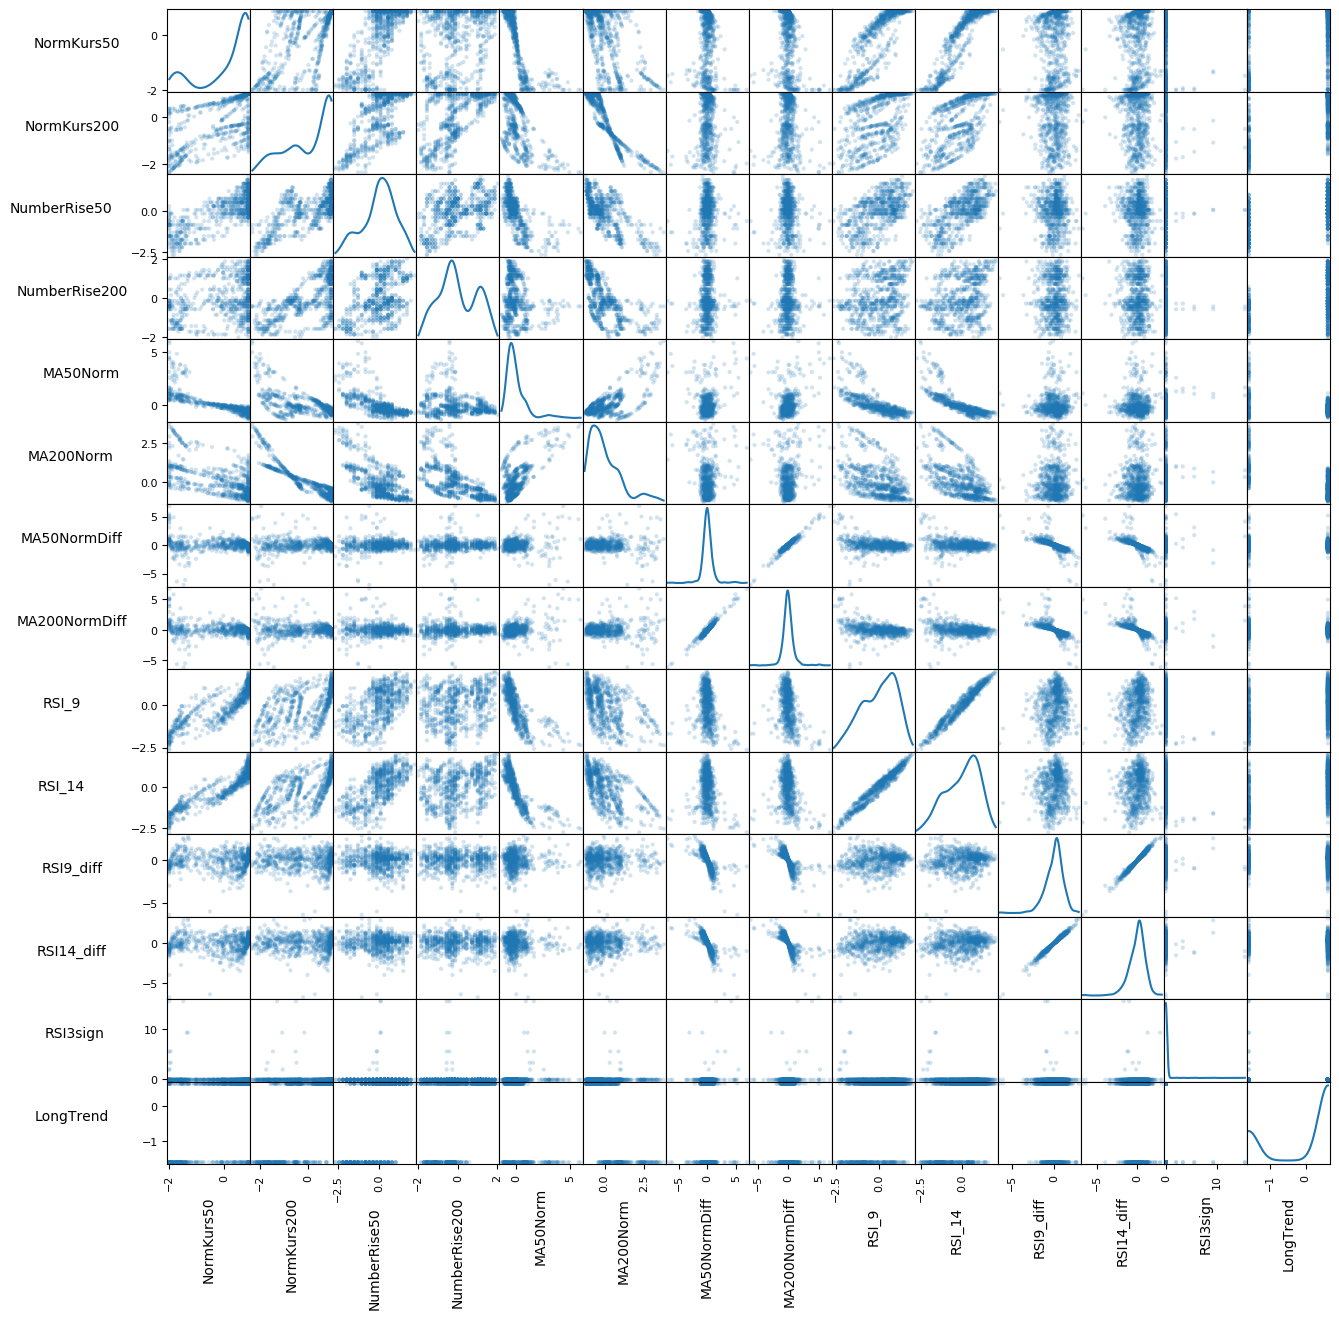

In [40]:
%%skip $skip_feature_analysis
#http://benalexkeen.com/correlation-in-python/
#https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas
from matplotlib.artist import setp

m.rc_file_defaults() #Reset sns

axs = pd.plotting.scatter_matrix(total_values.iloc[:,feature_plot], figsize=(15, 15), alpha=0.2, diagonal='kde')
n = len(features.iloc[:,feature_plot].columns)
for i in range(n):
    for j in range(n):
        # to get the axis of subplots
        ax = axs[i, j]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
#plt.yticks(rotation=90)
plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Scatter-Matrix', dpi=300)
plt.show()

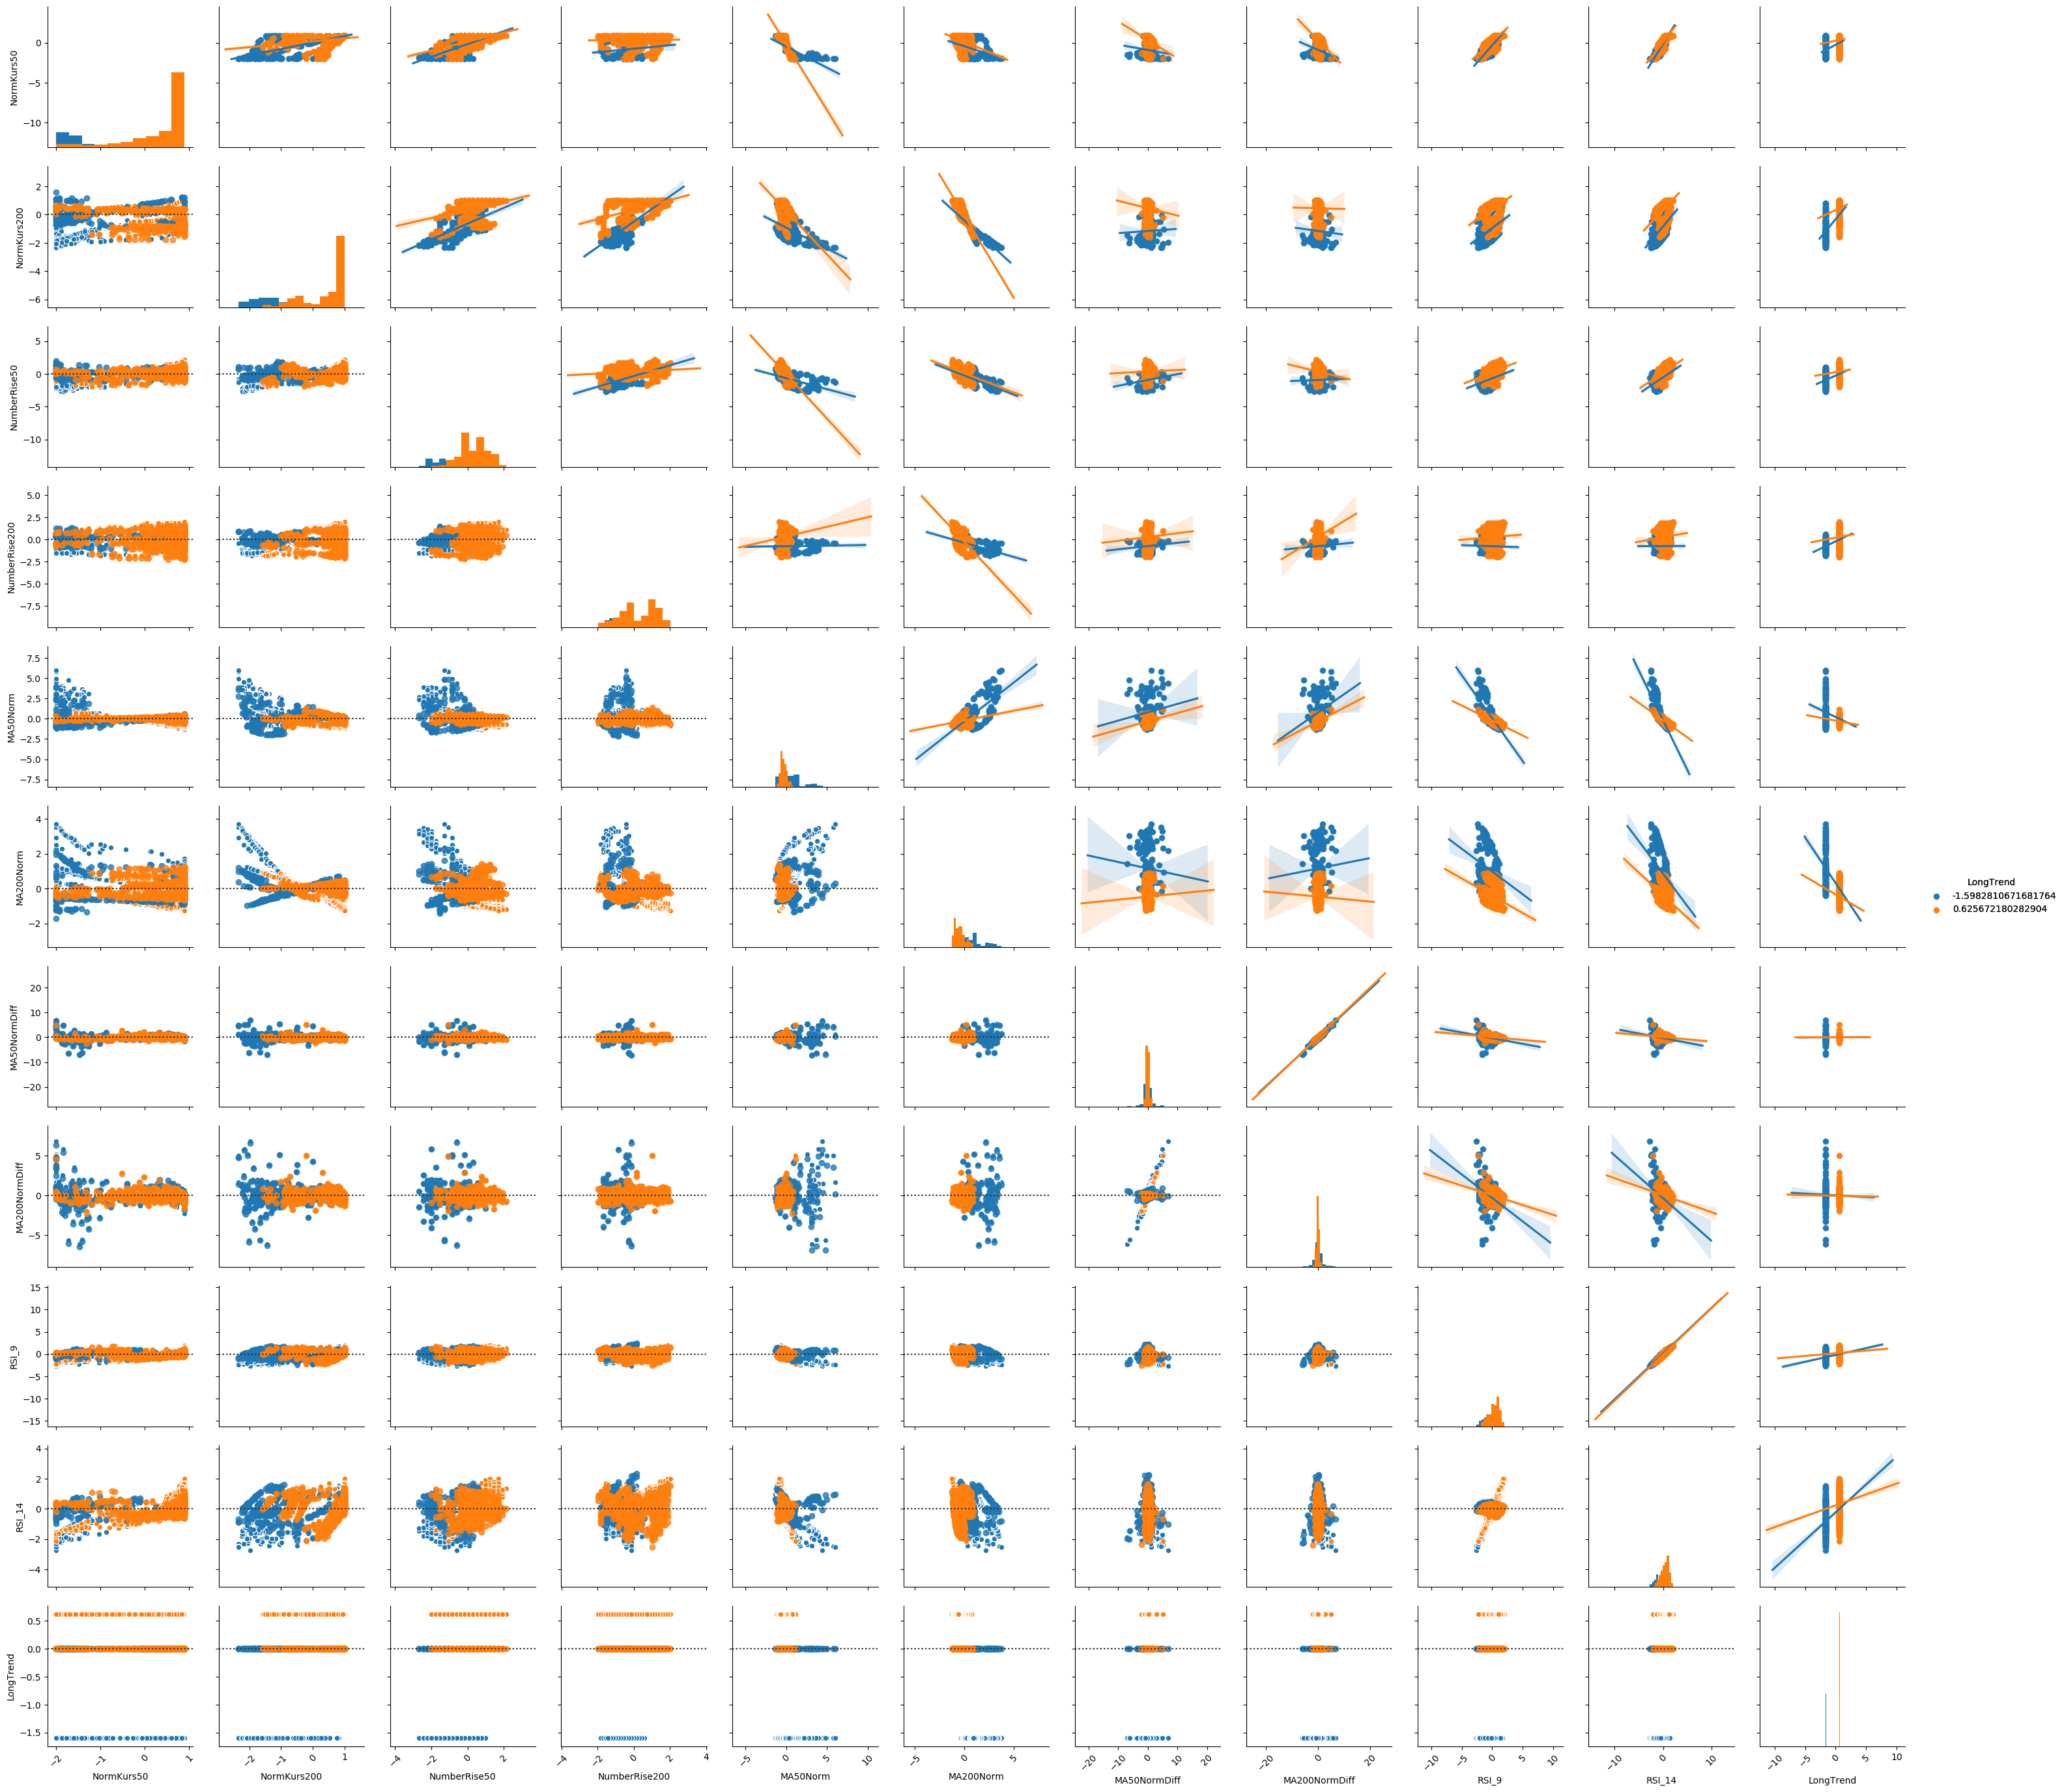

In [41]:
%%skip $skip_feature_analysis
import seaborn as sns

# https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

feature_plot=list(range(0,10,1))
feature_plot.extend([-1])

g = sns.pairplot(total_values.iloc[0:1000,feature_plot], hue=conf['class_name'], diag_kind="hist")
#total_values.columns[-1]
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Pairplot', dpi=300)
plt.show()

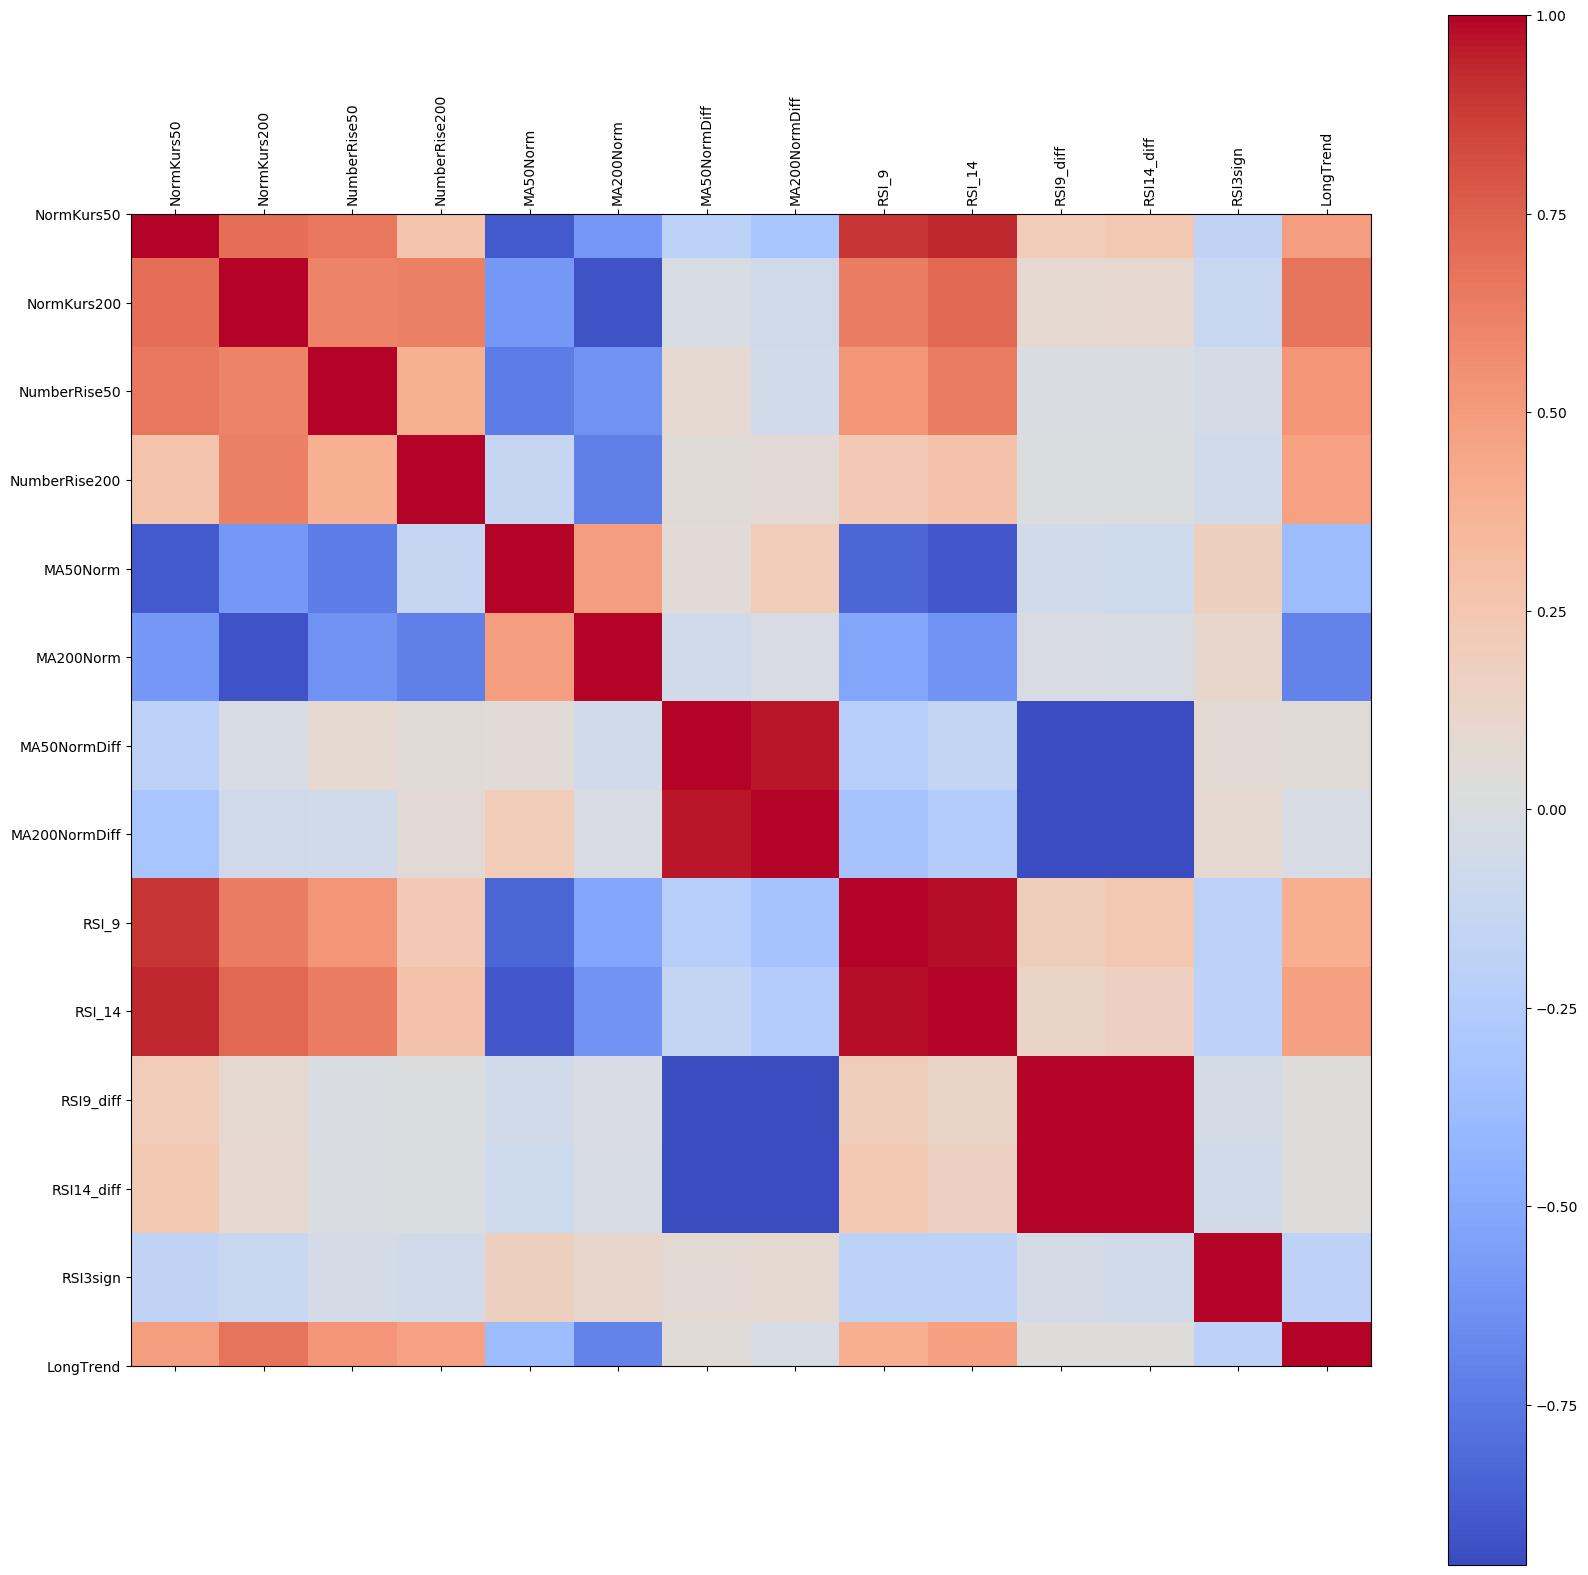

In [42]:
%%skip $skip_feature_analysis
#http://benalexkeen.com/correlation-in-python/
matfig = plt.figure(figsize=(20, 20))
plt.matshow(total_values.corr(method='spearman'), fignum=1, cmap=plt.get_cmap('coolwarm')) #Use spearman correlation instead of pearson to have a robust correlation
plt.xticks(range(len(total_values.columns)), total_values.columns)
plt.yticks(range(len(total_values.columns)), total_values.columns)
plt.xticks(rotation=90)
plt.colorbar()

plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Spearman_Correlation_Plot', dpi=300)

plt.show()

In [43]:
%%skip $skip_feature_analysis
subx = X_scaled.iloc[1000:2000, 0:4]
suby = y_scaled.iloc[1000:2000]

display(subx)
display(suby)

type(suby)
subx.corrwith(suby[conf['class_name']], drop=True)

Empty DataFrame
Columns: [NormKurs50, NormKurs200, NumberRise50, NumberRise200]
Index: []

Empty DataFrame
Columns: [LongTrend]
Index: []

NormKurs50       0.564402
NormKurs200      0.724342
NumberRise50     0.578720
NumberRise200    0.461304
MA50Norm        -0.503266
MA200Norm       -0.728568
MA50NormDiff     0.017764
MA200NormDiff   -0.059261
RSI_9            0.425161
RSI_14           0.512588
RSI9_diff       -0.018693
RSI14_diff      -0.016166
RSI3sign        -0.153420
dtype: float64

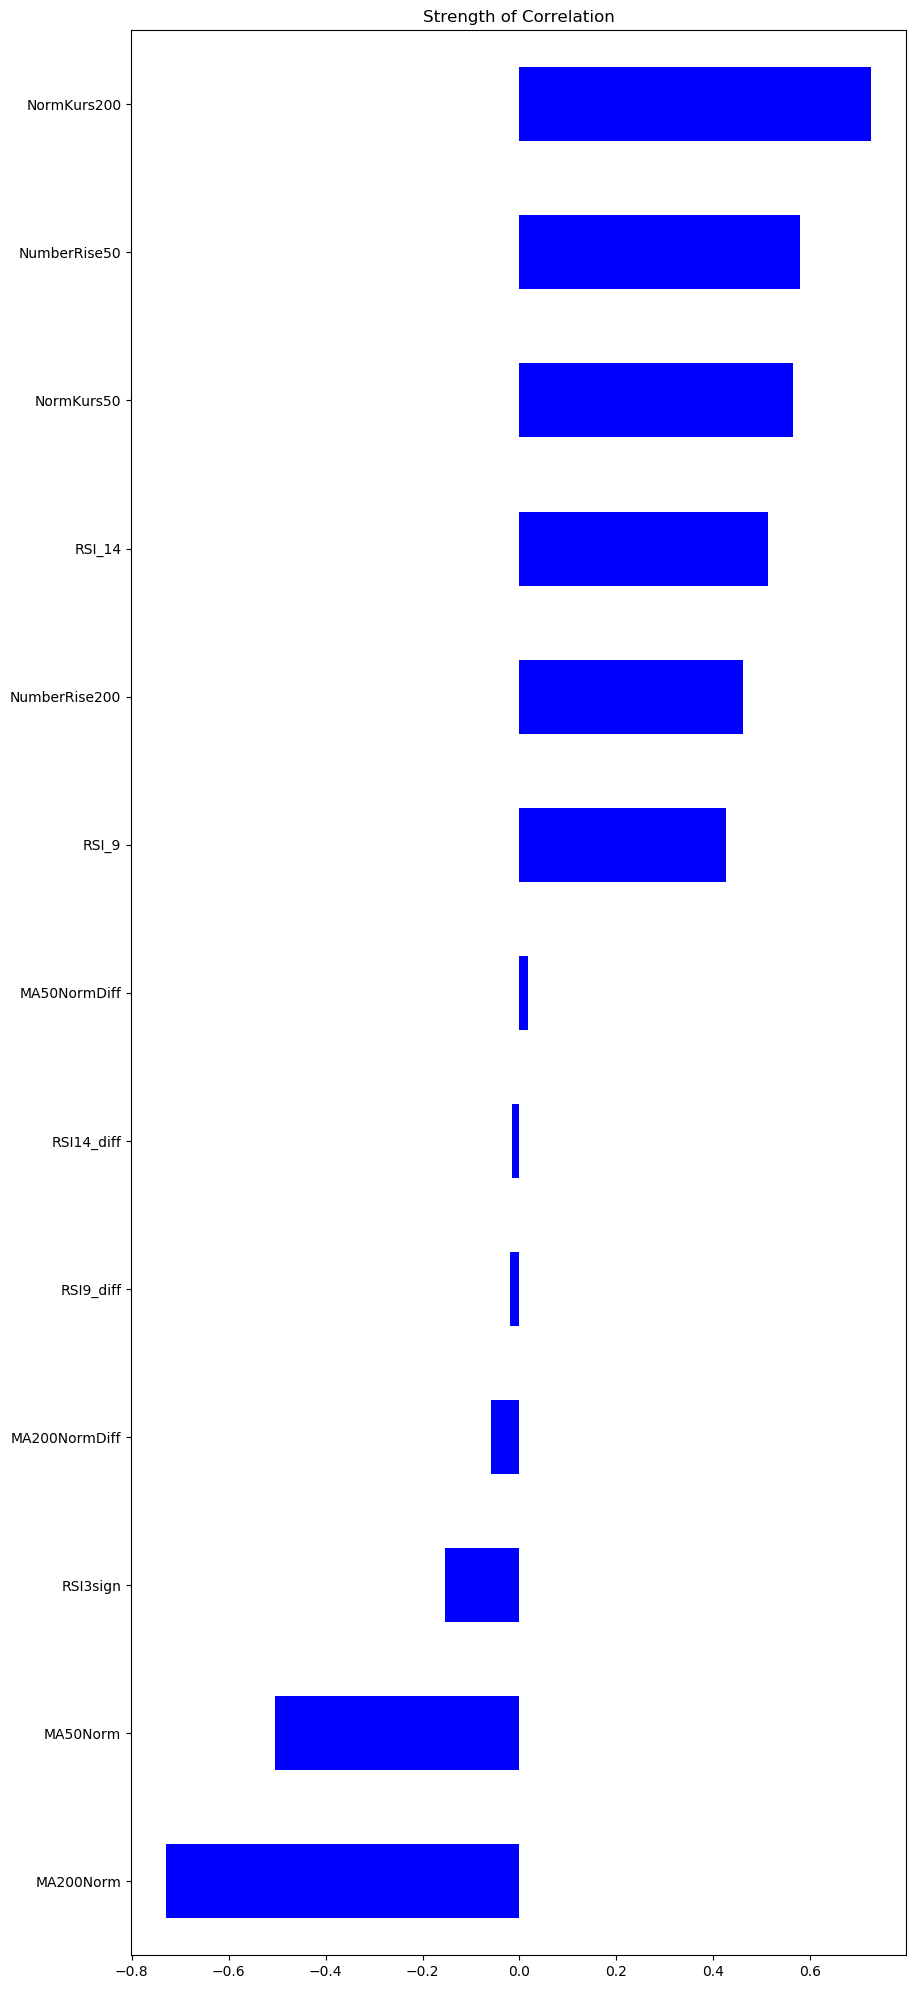

In [44]:
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from scipy.cluster import hierarchy
from scipy.spatial import distance

m.rc_file_defaults() #Reset sns

corr = X_scaled.corrwith(y_scaled[conf['class_name']], axis = 0)
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation', figsize=(10,25))

plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Correlation_Strength', dpi=300)

display(corr)

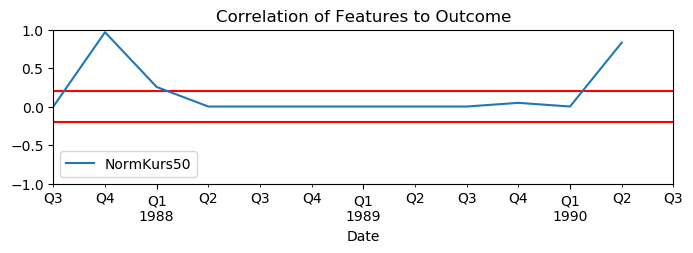

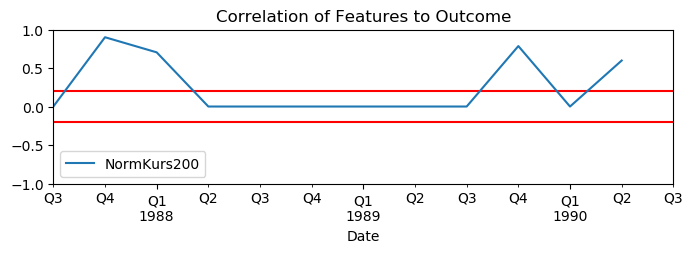

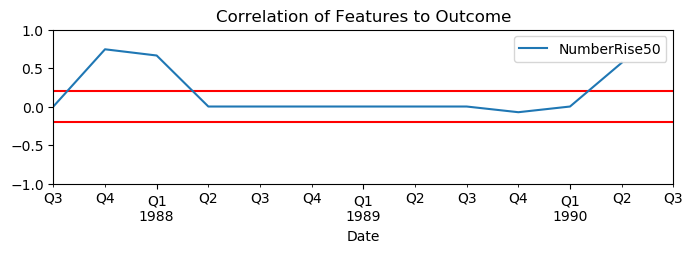

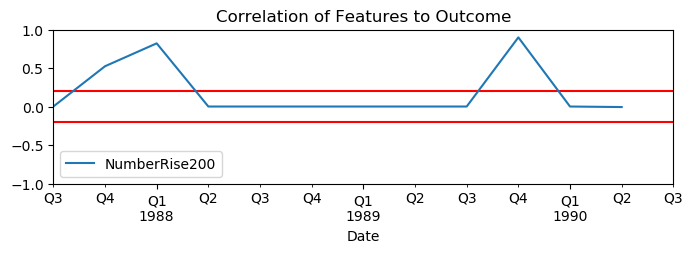

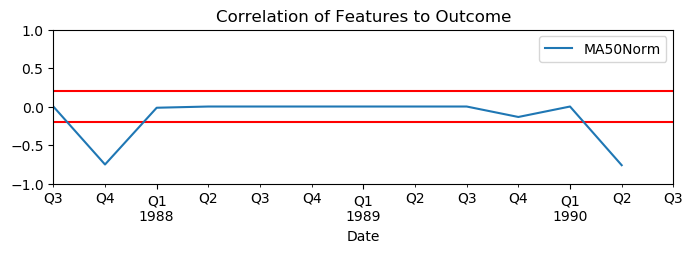

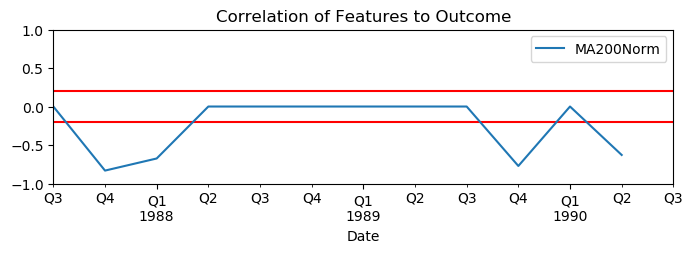

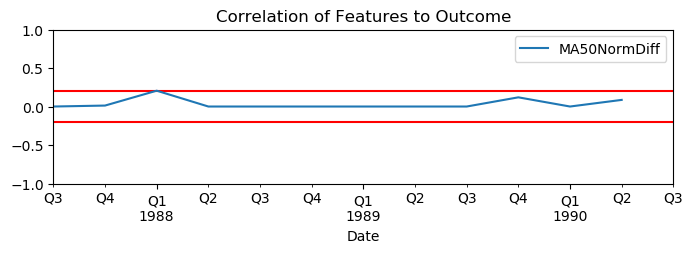

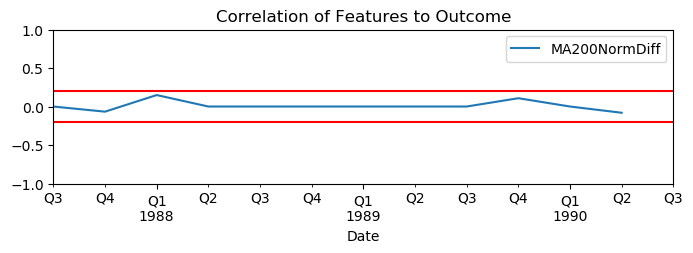

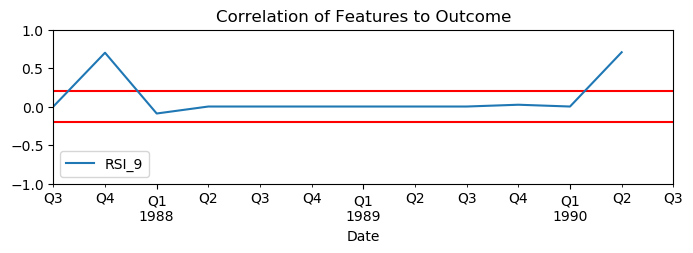

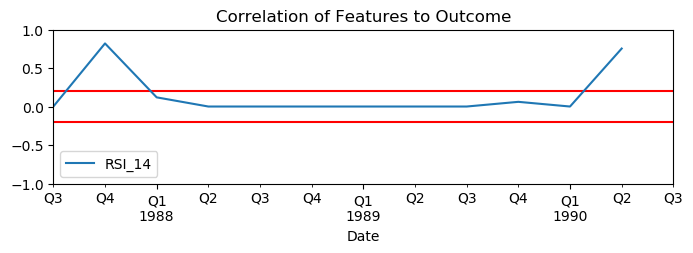

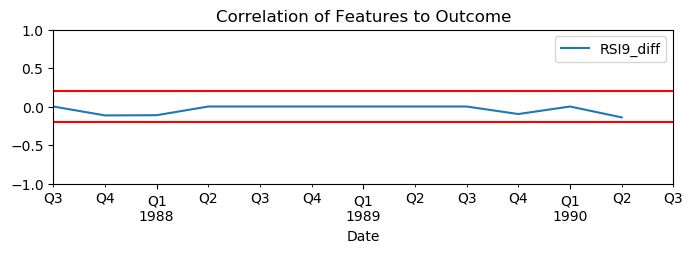

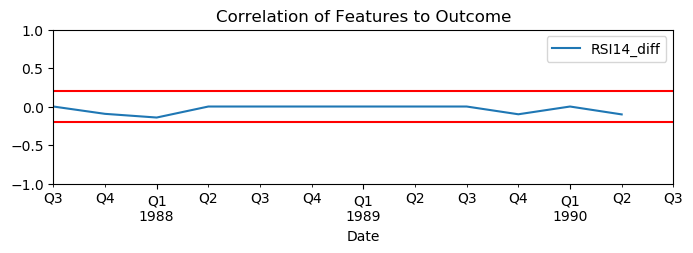

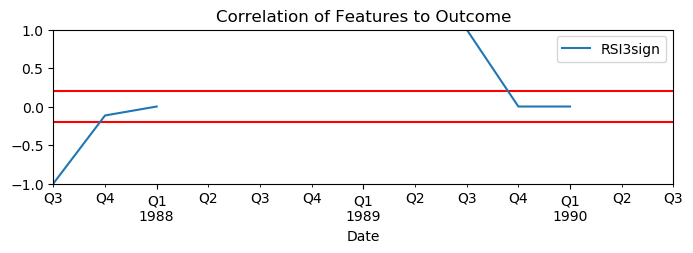

In [45]:
%%skip $skip_feature_analysis

################
## VERBESSERUNG
################

#Only for time series continuous correlation
#Check correlations for the following attributes
for col in X_scaled.columns:
    #cols = ['MA100Norm', 'RSI20']
    #col_index = [X_scaled.columns.get_loc(c) for c in cols if c in X_scaled]
    col_index = [X_scaled.columns.get_loc(col)]

    tmp = X_scaled.iloc[:,col_index].join(source).join(y_scaled).reset_index().set_index('Date').drop(columns=['id', 'Open', 'High', 'Low', 'Close'])
    #display(tmp)
    tmp.dropna().resample('Q').apply(lambda x: x.corr()).iloc[:,-1].unstack().iloc[:,:-1].plot(title='Correlation of Features to Outcome', figsize=(8,2))
    plt.ylim(-1, 1)
    plt.hlines([-0.2, 0.2], xmin=tmp.index[0], xmax=tmp.index[-1], colors='r')
    
    plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Temporal_Correlation_to_Outcome_{}'.format(col), dpi=300)

In [46]:
#tmp = X_scaled.iloc[:,[0]].join(df_timegraph).join(y_scaled).reset_index().set_index('Time').drop(columns=['id', 'High', 'Low', 'Close'])
#tmp
#tmp.dropna().resample('M').apply(lambda x: x.corr()).iloc[:,-1].unstack().iloc[:,:-1]
#fig = plt.Figure()
#plt.scatter(tmp.iloc[:,1], tmp.iloc[:,0])

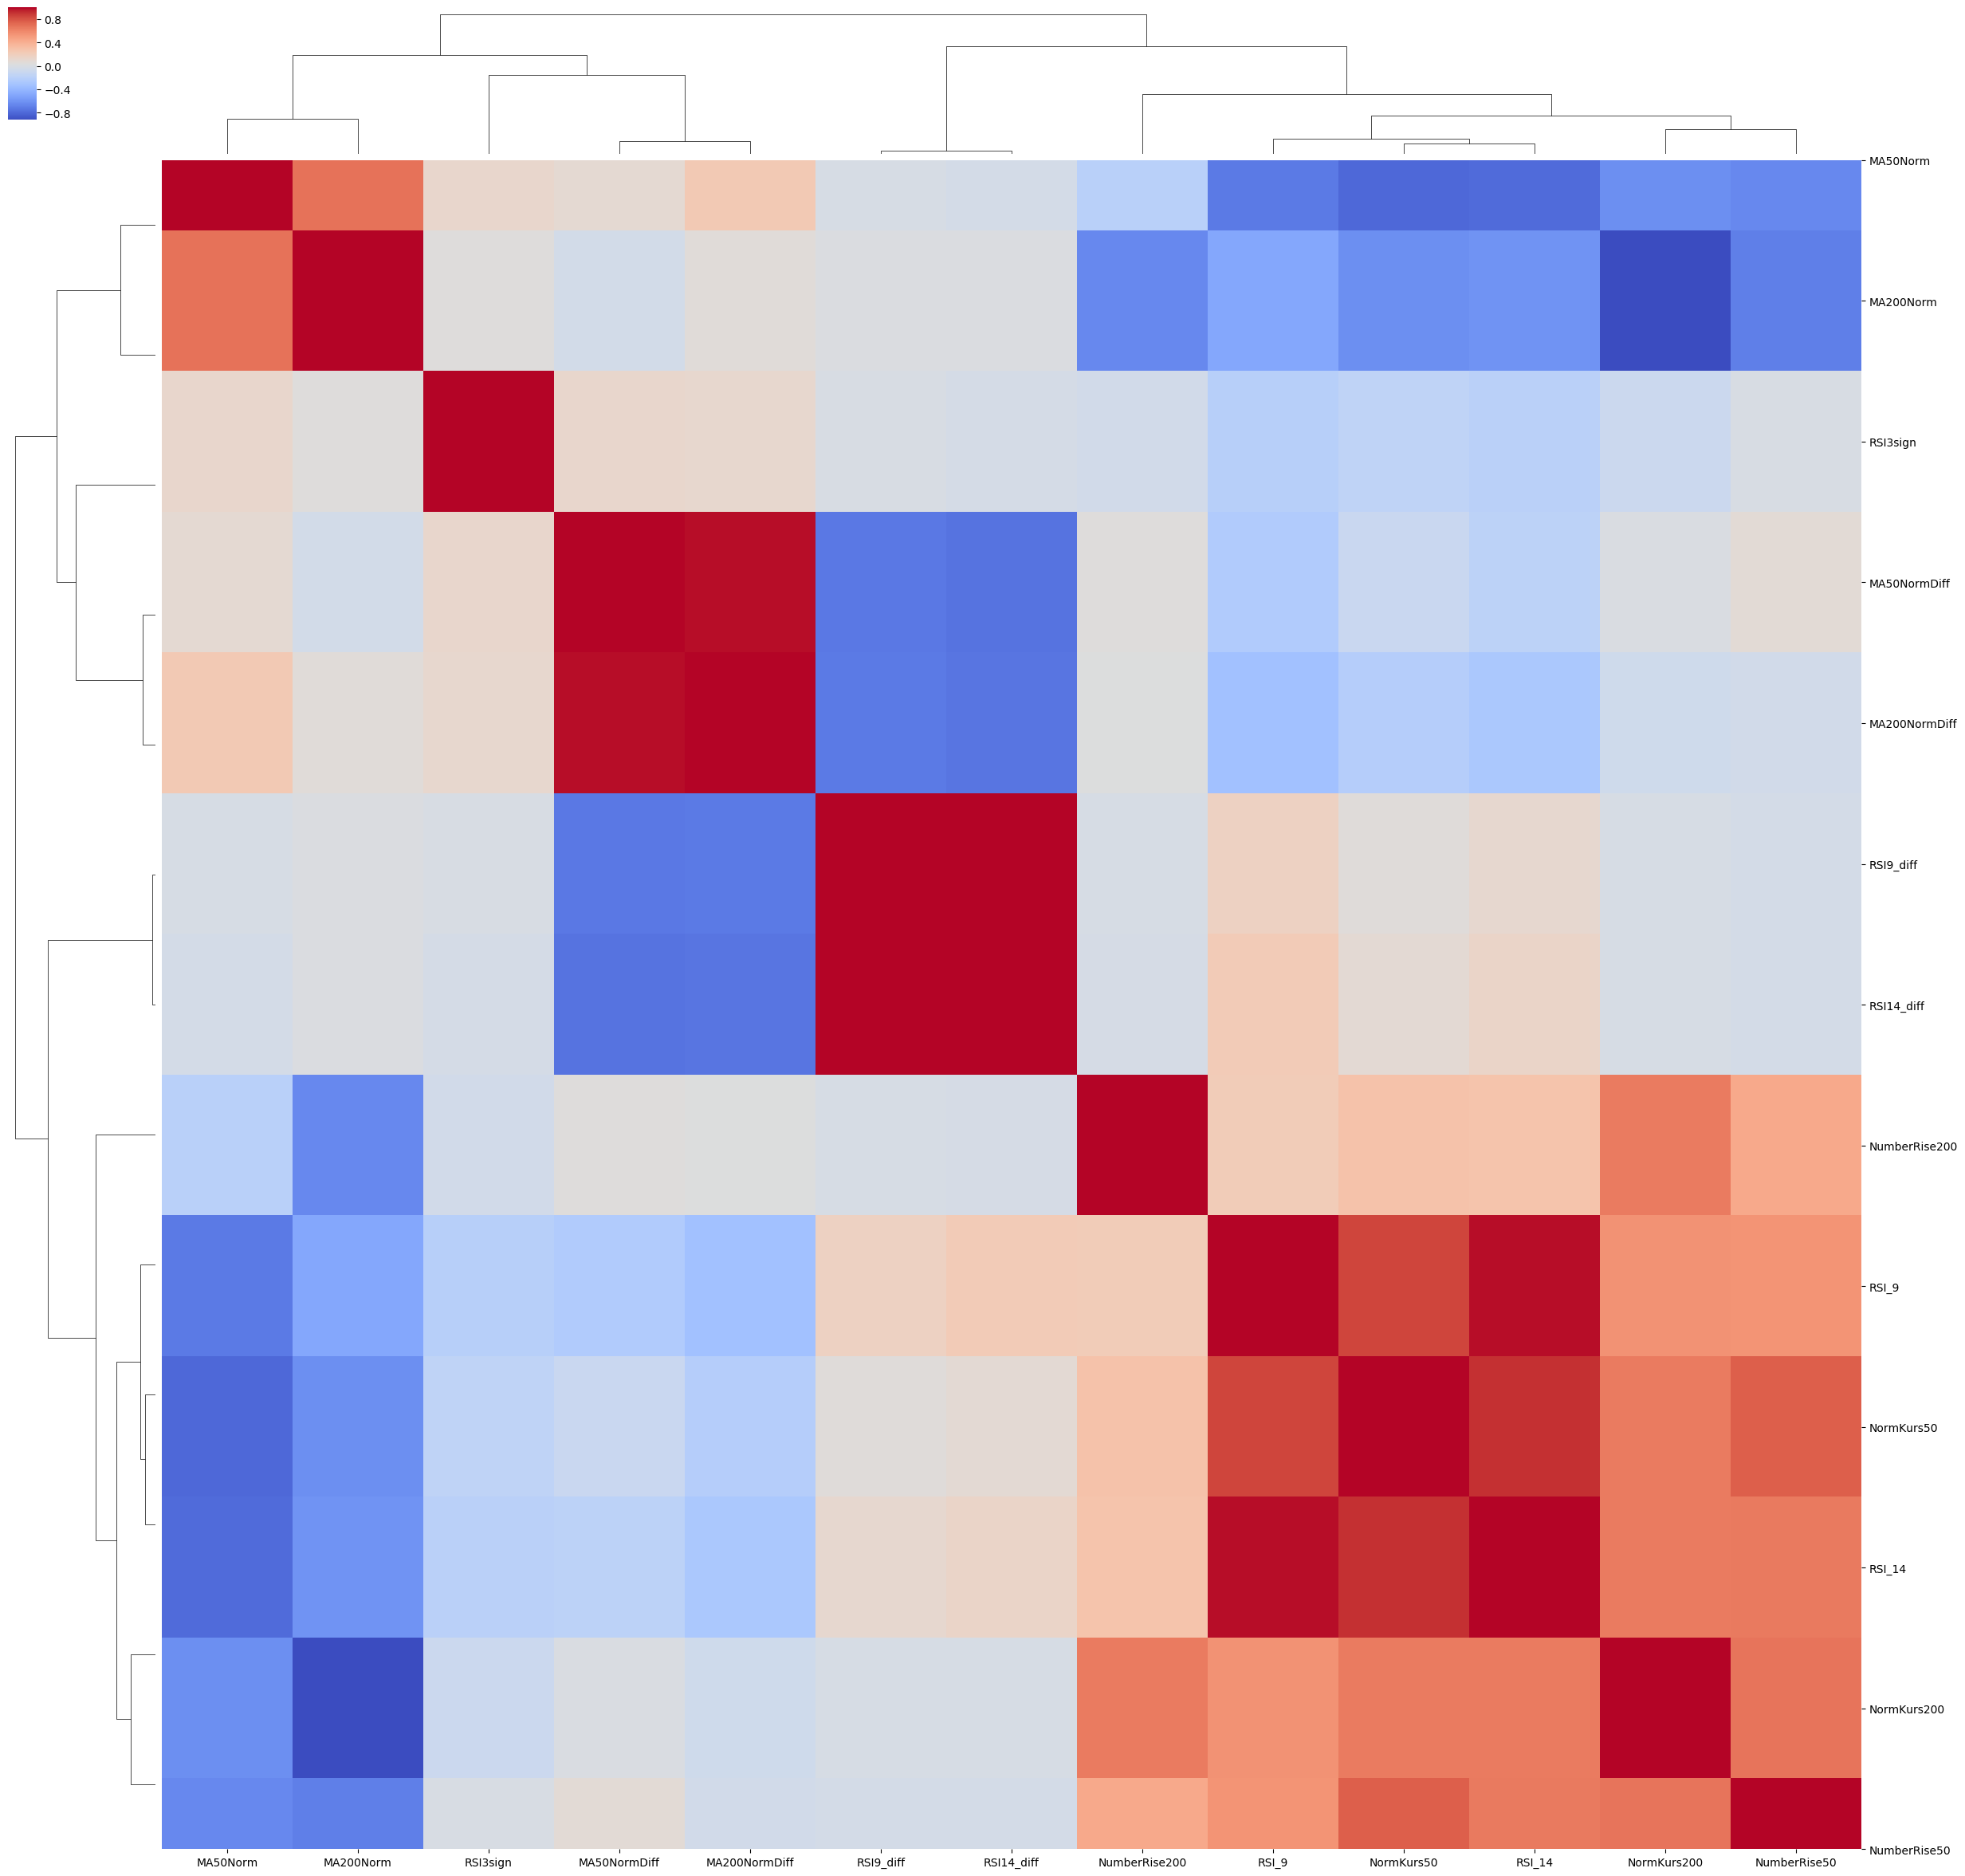

In [47]:
%%skip $skip_feature_analysis
corr_matrix = X_scaled.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage, row_cluster=True,col_cluster=True,figsize=(30,30),cmap=plt.get_cmap('coolwarm'))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Hierarchical_Linkage', dpi=300)

plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

### Feature visualization with Parallel Coordinates

In [48]:
%%skip $skip_feature_analysis
#Select a random subset to visualize
import random

total_values = features.join(outcomes)
print("Merged features and outcomes to use in correlation matrix")

#Reduce the training set with the number of samples randomly chosen
X_train_index_subset = sup.get_data_subset_index(1000, features)

#Select column values to use in the correlation plot
feature_plot=list(range(0,10,1))
#cols = ['MA2Norm', 'MA50Norm', 'MA200Norm', 'MA400Norm', 'MA200NormDiff', 'MA400NormDiff']
cols = total_values.columns[feature_plot]
print(feature_plot)
print(cols)

comparison_name = conf['class_name']
print("Class name: ", comparison_name)

df_fv = total_values.iloc[X_train_index_subset, :]

Merged features and outcomes to use in correlation matrix
No change of data. Size remains  750
Created a training subset
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index(['NormKurs50', 'NormKurs200', 'NumberRise50', 'NumberRise200',
       'MA50Norm', 'MA200Norm', 'MA50NormDiff', 'MA200NormDiff', 'RSI_9',
       'RSI_14'],
      dtype='object')
Class name:  LongTrend


In [49]:
%%skip $skip_feature_analysis
# Use parallel coordinates to visualize the classes and all features for plotting
#https://plot.ly/python/parallel-coordinates-plot/
#http://benalexkeen.com/parallel-coordinates-in-matplotlib/
from matplotlib import ticker

def plotParallelCoordinates(df, cols, colours, comparison_name):
    x = [i for i, _ in enumerate(cols)]

    # create dict of categories: colours
    colours = {df[comparison_name].astype('category').cat.categories[i]: colours[i] 
               for i, _ in enumerate(df[comparison_name].astype('category').cat.categories)}

    # Create (X-1) sublots along x axis
    fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

    # Get min, max and range for each column
    # Normalize the data for each column
    min_max_range = {}
    for col in cols:
        min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
        df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

    # Plot each row
    for i, ax in enumerate(axes):
        for idx in df.index:
            mpg_category = df.loc[idx, comparison_name]
            ax.plot(x, df.loc[idx, cols], colours[mpg_category])
        ax.set_xlim([x[i], x[i+1]])
    
    # Set the tick positions and labels on y axis for each plot
    # Tick positions based on normalised data
    # Tick labels are based on original data
    def set_ticks_for_axis(dim, ax, ticks):
        min_val, max_val, val_range = min_max_range[cols[dim]]
        step = val_range / float(ticks-1)
        tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
        norm_min = df[cols[dim]].min()
        norm_range = np.ptp(df[cols[dim]])
        norm_step = norm_range / float(ticks-1)
        ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
        ax.yaxis.set_ticks(ticks)
        ax.set_yticklabels(tick_labels)

    for dim, ax in enumerate(axes):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        set_ticks_for_axis(dim, ax, ticks=6)
        ax.set_xticklabels([cols[dim]])
    

    # Move the final axis' ticks to the right-hand side
    ax = plt.twinx(axes[-1])
    dim = len(axes)
    ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[-2], cols[-1]])

    # Remove space between subplots
    plt.subplots_adjust(wspace=0)

    # Add legend to plot
    plt.legend(
        [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[comparison_name].astype('category').cat.categories],
        df[comparison_name].astype('category').cat.categories,
        bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

    plt.title("Values of car attributes by LongTrend category")
    
    plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Parallel_Coordinates', dpi=300)

    plt.show()

C:\Users\wendt.ICT\.conda\envs\env_ml\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


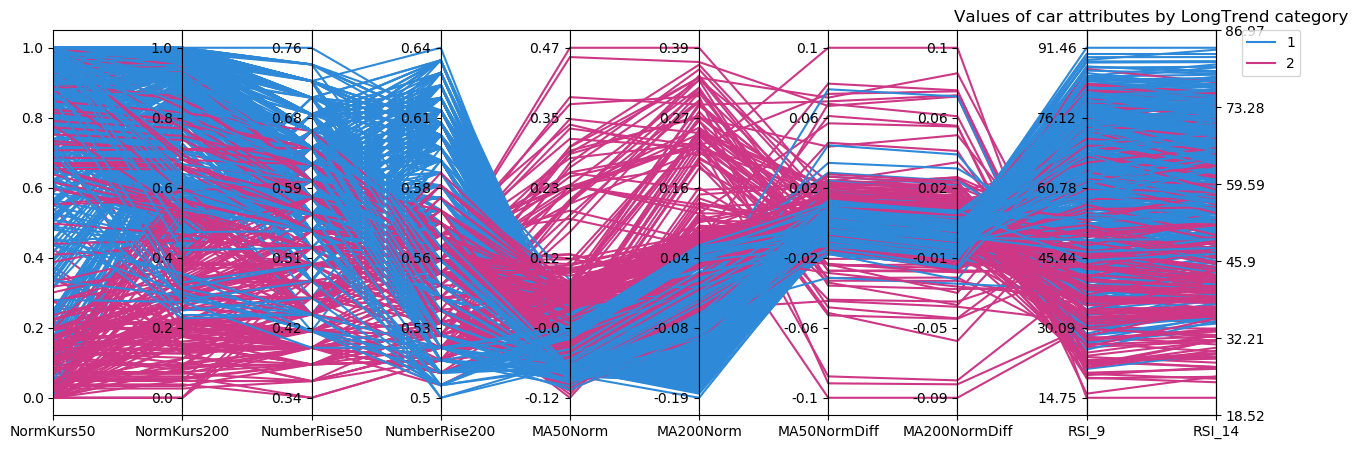

In [50]:
%%skip $skip_feature_analysis
m.rc_file_defaults() #Reset sns

colors = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']
plotParallelCoordinates(df_fv, cols, colors, comparison_name)

### Visualize Data with t-SNE

In [51]:
%%skip $skip_feature_analysis
#Select a random subset to visualize
import random

#Reduce the training set with the number of samples randomly chosen
X_train_index_subset = sup.get_data_subset_index(1000, X_scaled)

No change of data. Size remains  750
Created a training subset


In [52]:
%%skip $skip_feature_analysis
from sklearn.manifold import TSNE
#%matplotlib notebook
#%matplotlib inline

np.random.seed(0)
#X_embedded = TSNE(n_components=2, perplexity=5.0, early_exaggeration=12.0, n_iter=5000, 
#                  n_iter_without_progress=1000, learning_rate=10).fit_transform(embedded)
X_embedded = TSNE(n_components=2, perplexity=10.0, early_exaggeration=100.0, n_iter=5000, 
                  n_iter_without_progress=1000, learning_rate=10).fit_transform(X_scaled.iloc[X_train_index_subset,:])

#### Plot t-SNE with best parameters

In [53]:
%matplotlib inline
m.rc_file_defaults() #Reset sns

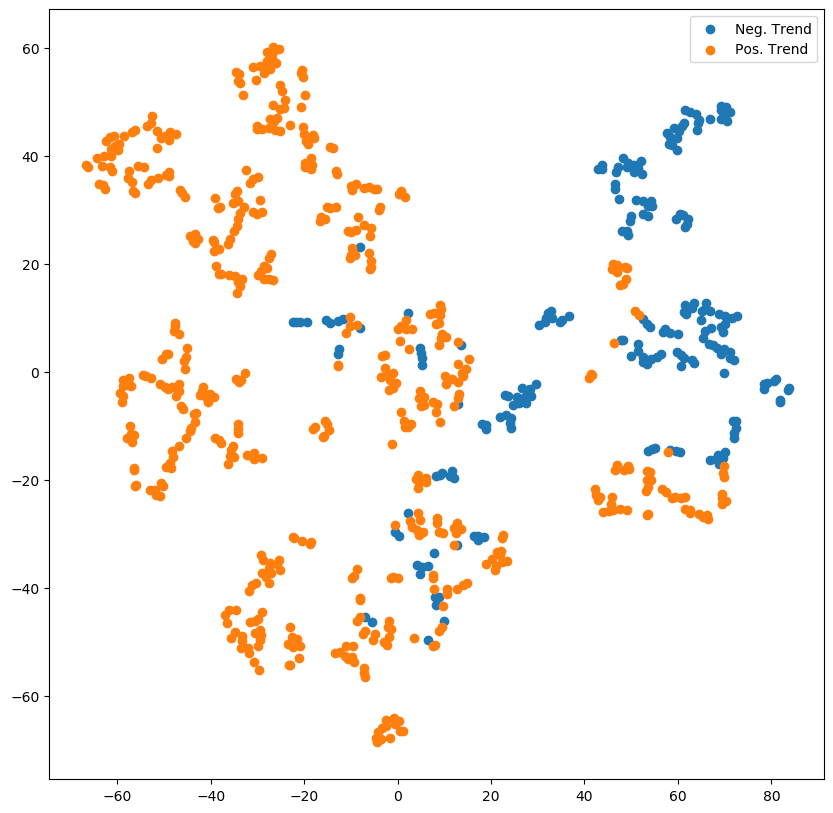

In [54]:
%%skip $skip_feature_analysis
#Plot with texts added to the graphs

#from adjustText import adjust_text
targets = np.array(y[X_train_index_subset]).flatten()

plt.figure(figsize=(10,10))
texts = []
for i, t in enumerate(set(targets)):
    idx = targets == t
    #for x, y in zip(X_embedded[idx, 0], X_embedded[idx, 1]):
        #texts.append(plt.text(x, y, t))
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=class_labels[t])   

#adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5)) 

plt.legend(bbox_to_anchor=(1, 1));
plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_T-SNE_Plot', dpi=300)

#### t-SNE Parameter Grid Search

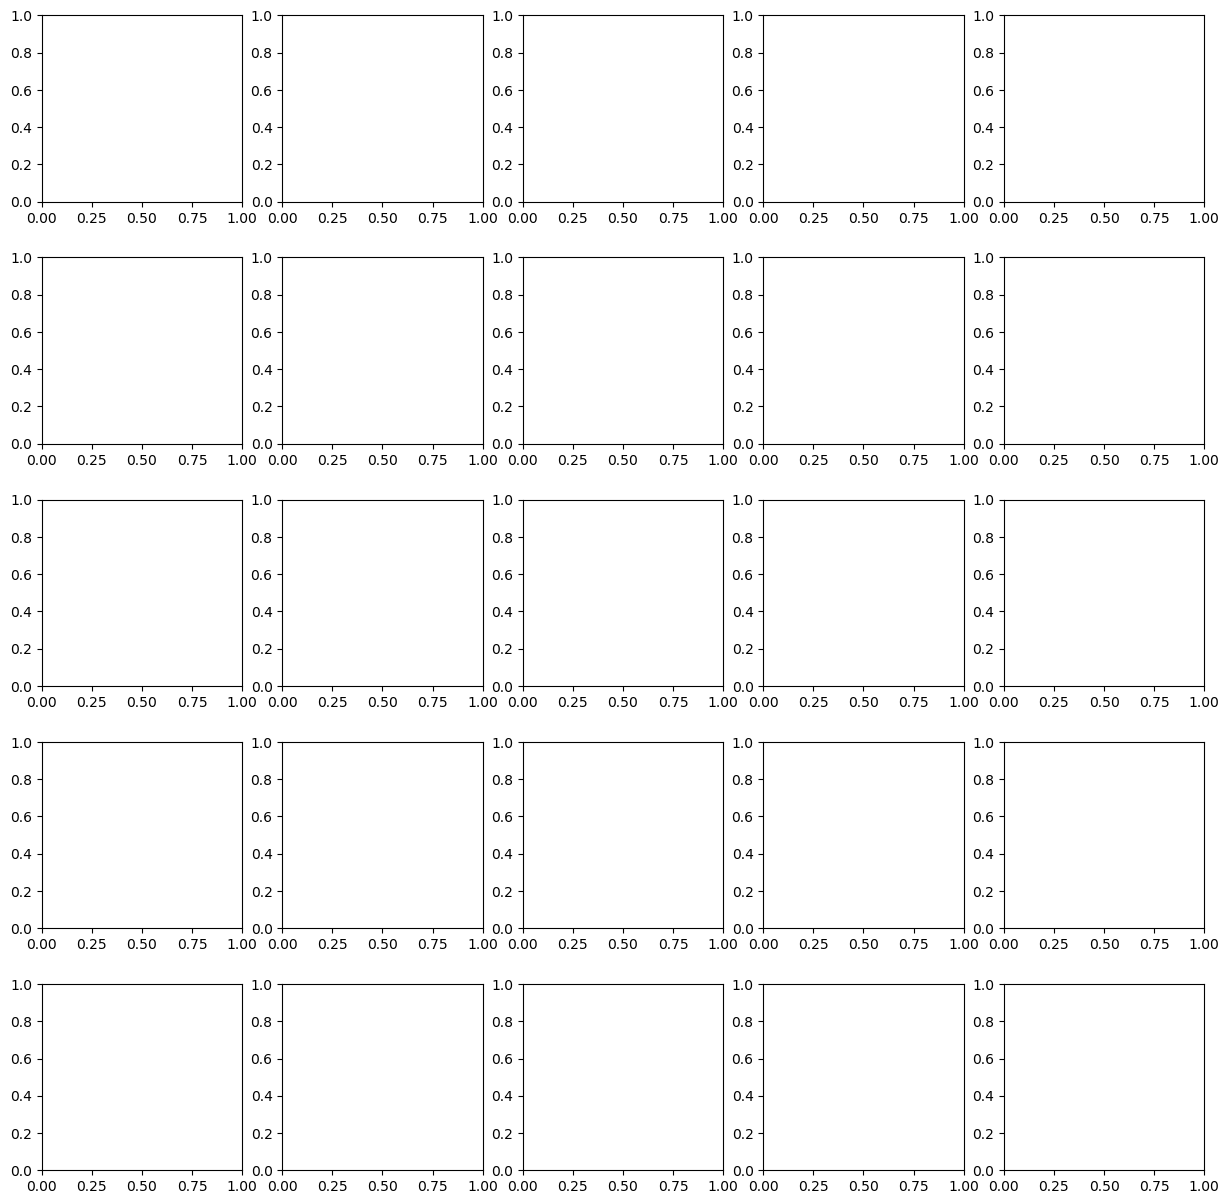

In [55]:
%%skip $skip_feature_analysis
from IPython.display import clear_output

#Optimize t-sne plot
tne_gridsearch = False

#Create a TSNE grid search with two variables
perplex = [5, 10, 30, 50, 100]
exaggregation = [5, 12, 20, 50, 100]
#learning_rate = [10, 50, 200]

fig, axarr = plt.subplots(len(perplex), len(exaggregation), figsize=(15,15))

if tne_gridsearch == True:
    #for m,l in enumerate(learning_rate):
    for k,p in enumerate(perplex):
        #print("i {}, p {}".format(i, p))
        for j,e in enumerate(exaggregation):
            #print("j {}, e {}".format(j, e))
            X_embedded = TSNE(n_components=2, perplexity=p, early_exaggeration=e, n_iter=5000, 
                              n_iter_without_progress=1000, learning_rate=10).fit_transform(X_scaled.iloc[X_train_index_subset,:])

            for i, t in enumerate(set(targets)):
                idx = targets == t
                axarr[k,j].scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=class_labels[t])

            axarr[k,j].set_title("p={}, e={}".format(p, e))
        
            clear_output(wait=True)
            print('perplex paramater={}/{}, exaggregation parameterj={}/{}'.format(k, len(perplex), j, len(exaggregation)))
        
fig.subplots_adjust(hspace=0.3)

### UMAP Cluster Analysis
Use a supervised/unsupervised analysis to make the clusters

In [56]:
%%skip $skip_feature_analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='poster')

#import umap
import umap.umap_ as umap  #Work around from https://github.com/lmcinnes/umap/issues/24

#%time #Time of the whole cell
embeddingUnsupervised = umap.UMAP(n_neighbors=5).fit_transform(X_scaled)
#%time #Time of the whole cell
embeddingSupervised = umap.UMAP(n_neighbors=5).fit_transform(X_scaled, y=y)

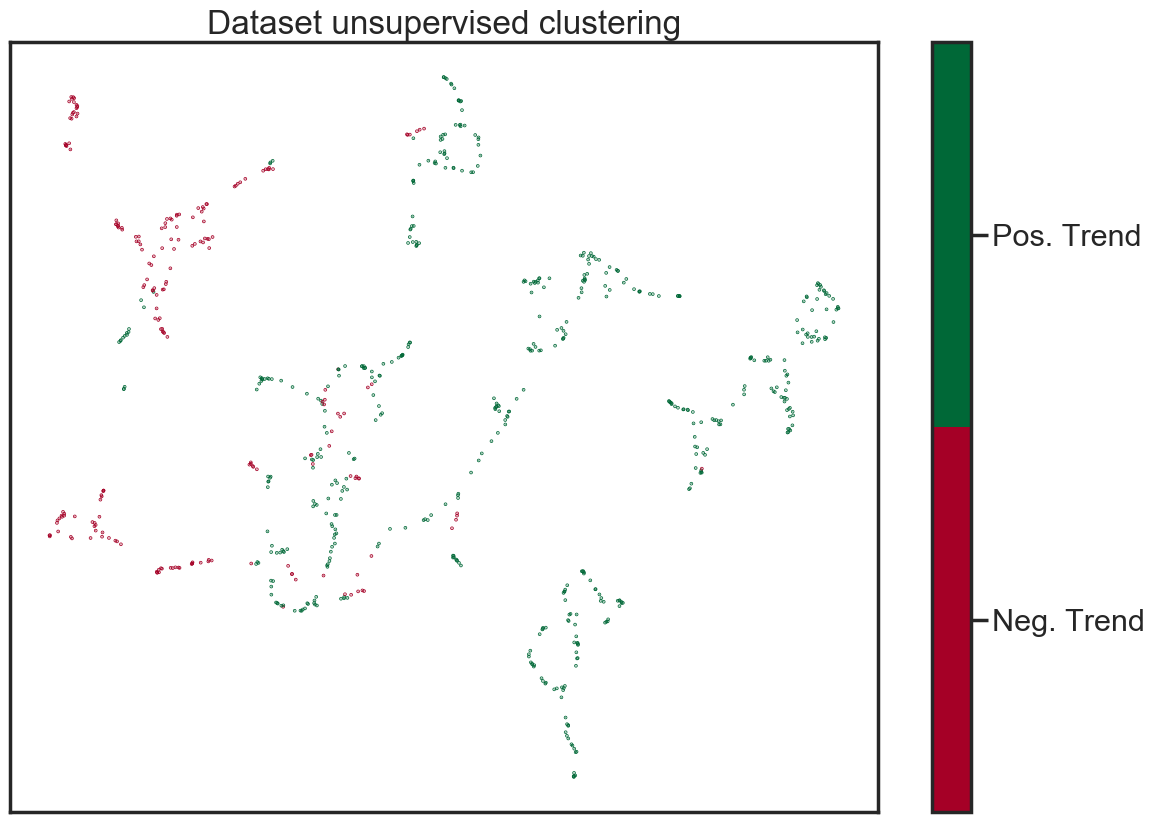

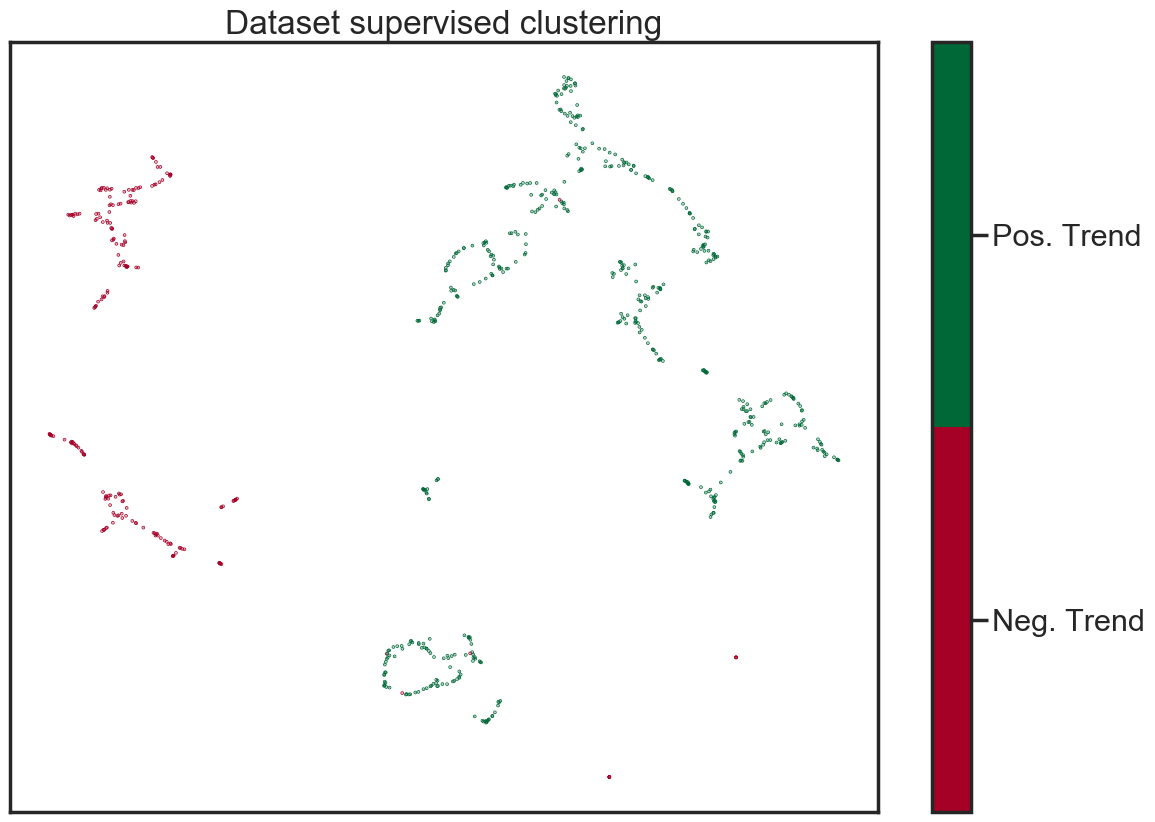

In [57]:
%%skip $skip_feature_analysis
vis.plotUmap(embeddingUnsupervised, y, list(class_labels.values()), 'Dataset unsupervised clustering', cmapString='RdYlGn')
plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_UMAP_Unsupervised', dpi=300)
vis.plotUmap(embeddingSupervised, y, list(class_labels.values()), 'Dataset supervised clustering')
plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_UMAP_Supervised', dpi=300)

### PCA Analysis

C:\Users\wendt.ICT\.conda\envs\env_ml\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


95% variance covered with the 6 first components. Values=[0.432 0.699 0.798 0.873 0.914 0.946]


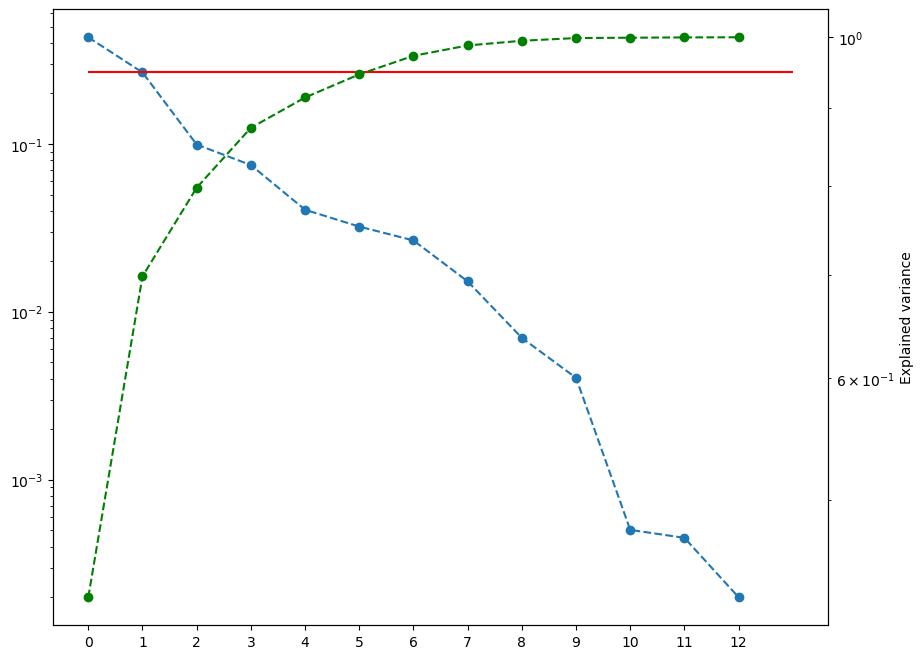

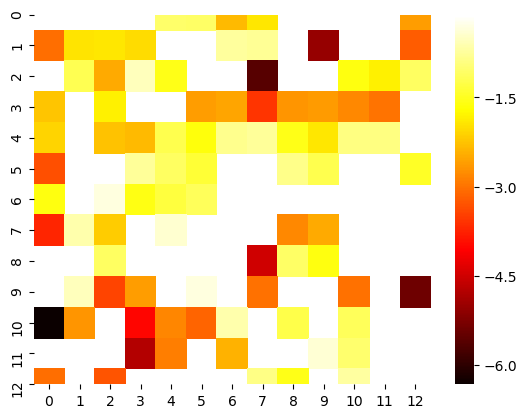

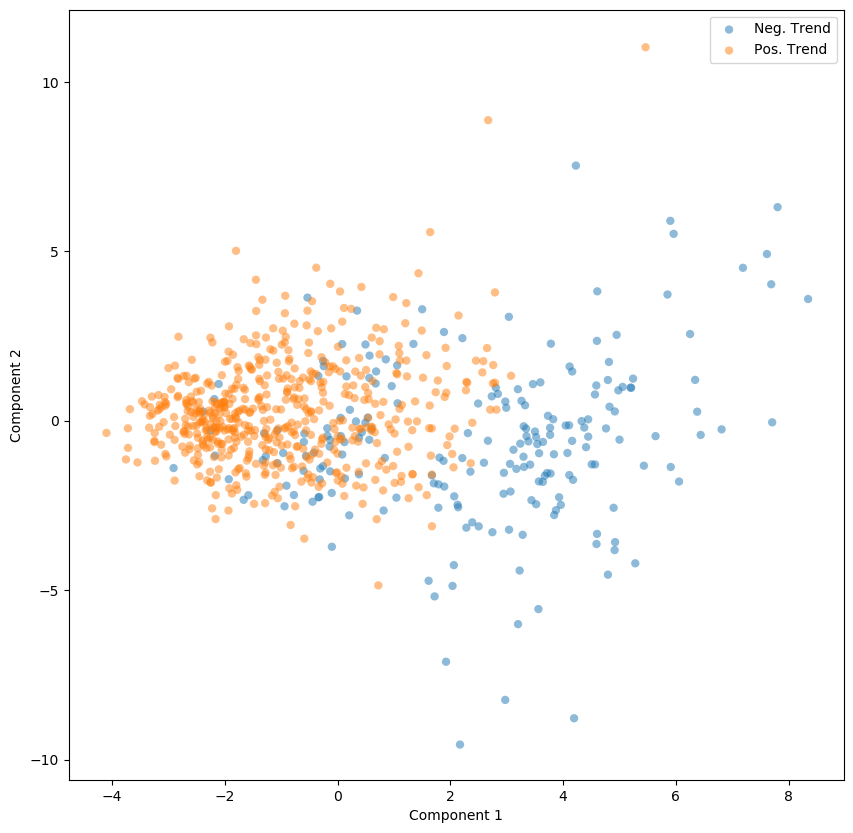

In [58]:
%%skip $skip_feature_analysis
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

m.rc_file_defaults() #Reset sns

pca_trafo = PCA().fit(X_scaled);
pca_values = pca_trafo.transform(X_scaled)
#from adjustText import adjust_text
targets = np.array(y).flatten()

fig, ax1 = plt.subplots(figsize=(10, 8))
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o', color='green');
plt.xlabel("Principal Component")
plt.ylabel("Explained variance")
plt.xticks(np.arange(0, len(pca_trafo.explained_variance_ratio_)))
plt.hlines(0.95, 0, len(pca_trafo.explained_variance_ratio_.cumsum()), colors='red', linestyles='solid', label='95% variance covered')
plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_PCA_Variance_Coverage', dpi=300)


fig = plt.figure()
sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(X_scaled.shape[1]))), cmap="hot", cbar=True)

necessary_components = pca_trafo.explained_variance_ratio_.cumsum()[pca_trafo.explained_variance_ratio_.cumsum()<0.95]
print("95% variance covered with the {} first components. Values={}". format(len(necessary_components), necessary_components))

plt.figure(figsize=(10,10))
#plt.scatter(pca_values[:,0], pca_values[:,1], c=targets, edgecolor='none', label=class_labels.values(), alpha=0.5)
for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(pca_values[idx, 0], pca_values[idx, 1], label=class_labels[t], edgecolor='none', alpha=0.5)  

plt.legend(labels=class_labels.values(), bbox_to_anchor=(1, 1));
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_PCA_Plot', dpi=300)

plt.show()

## Feature Selection

In [59]:
#Data has already been scaled

In [60]:
#Select a random subset to visualize
import random

#Reduce the training set with the number of samples randomly chosen
X_train_index_subset = sup.get_data_subset_index(1000, X_scaled)

relevantFeatureList = []
selected_feature_list = pd.DataFrame()

No change of data. Size remains  750
Created a training subset


In [61]:
#Predict with logistic regression
from sklearn.linear_model import LogisticRegression

def predict_features_simple(X, y):
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
    return clf.score(X, y)

### Lasso Feature Selection

Best alpha using built-in LassoCV: 0.015206
Best score using built-in LassoCV: 0.568121
Lasso picked 5 variables and eliminated the other 8 variables
['MA200Norm', 'RSI3sign', 'NumberRise50', 'NormKurs50', 'NormKurs200']


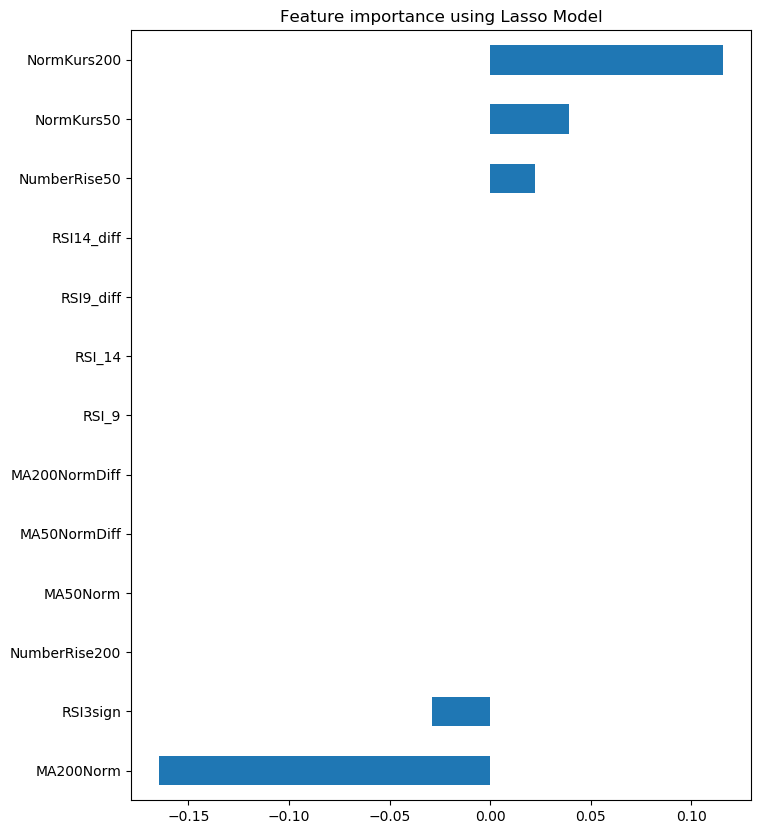

Prediction of training data with logistic regression: 0.91


In [62]:
%%skip $skip_feature_selection
#%matplotlib inline
from sklearn.linear_model import LassoCV

m.rc_file_defaults() #Reset sns

def execute_lasso_feature_selection(X_scaled, y):
    reg = LassoCV(cv=10, max_iter = 100000)
    reg.fit(X_scaled, y)
    coef = pd.Series(reg.coef_, index = X_scaled.columns)
    print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X_scaled,y))
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    imp_coef = coef.sort_values()
    coefList = list(imp_coef[imp_coef!=0].index)
    print(coefList)

    #plt.figure()
    m.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    
    plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Lasso_Model_Weights', dpi=300)
    
    plt.show()
    
    return coefList
    
#if do_feature_analysis==True:
coefList = execute_lasso_feature_selection(X_scaled, y)
selected_feature_list = selected_feature_list.append(pd.Series(name='Lasso', data=coefList))
relevantFeatureList.extend(coefList)

print("Prediction of training data with logistic regression: {0:.2f}".format(predict_features_simple(X_scaled[coefList], y)))

### Tree based feature selection

[0.135 0.253 0.077 0.096 0.101 0.162 0.019 0.018 0.039 0.07  0.013 0.013
 0.005]
Best score: 1.000000
Tree search picked 12 variables and eliminated the other 1 variables
['RSI14_diff', 'RSI9_diff', 'MA200NormDiff', 'MA50NormDiff', 'RSI_9', 'RSI_14', 'NumberRise50', 'NumberRise200', 'MA50Norm', 'NormKurs50', 'MA200Norm', 'NormKurs200']


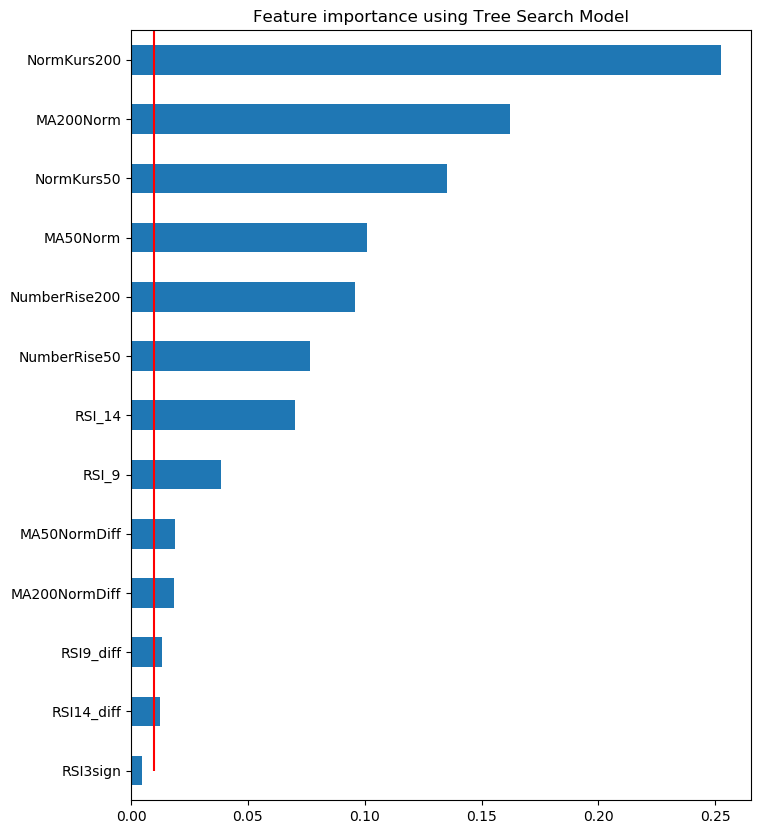

Prediction of training data with logistic regression: 0.91


In [63]:
%%skip $skip_feature_selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

def execute_treebased_feature_selection(X_scaled, y):
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X_scaled, y)
    print(clf.feature_importances_)
    print("Best score: %f" %clf.score(X_scaled, y))
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X_scaled)
    X_new.shape

    threshold = 0.010
    tree_coef = pd.Series(clf.feature_importances_, index = X_scaled.columns)

    print("Tree search picked " + str(sum(tree_coef >= threshold)) + " variables and eliminated the other " +  str(sum(tree_coef < threshold)) + " variables")
    imp_treecoef = tree_coef.sort_values()
    treecoefList = list(imp_treecoef[imp_treecoef>threshold].index)
    print(treecoefList)

    plt.figure()
    m.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_treecoef.plot(kind = "barh")
    plt.title("Feature importance using Tree Search Model")
    plt.vlines(threshold, 0, len(X_scaled.columns), color='red')
    
    plt.savefig(image_save_directory + '/' + conf['dataset_name'] + '_Tree_Based_Importance', dpi=300)
    
    plt.show()
    
    return treecoefList

#if do_feature_analysis==True:
treecoefList = execute_treebased_feature_selection(X_scaled, y)
selected_feature_list = selected_feature_list.append(pd.Series(name='Tree', data=treecoefList))
relevantFeatureList.extend(treecoefList)

print("Prediction of training data with logistic regression: {0:.2f}".format(predict_features_simple(X_scaled[treecoefList], y)))

### Backward Elimination

In [64]:
%%skip $skip_feature_selection
#Backward Elimination - Wrapper method
import statsmodels.api as sm

def execute_backwardelimination_feature_selection(X_scaled, y):
    cols = list(X_scaled.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X_scaled[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols

    print(selected_features_BE)
    print("\nNumber of features={}. Original number of features={}\n".format(len(selected_features_BE), len(X_scaled.columns)))
    [print("column {} removed".format(x)) for x in X_scaled.columns if x not in selected_features_BE]
    print("Finished")
    
    return selected_features_BE

#if do_feature_analysis==True:
selected_features_BE = execute_backwardelimination_feature_selection(X_scaled, y)
relevantFeatureList.extend(selected_features_BE)
selected_feature_list = selected_feature_list.append(pd.Series(name='Backward_Elimination', data=selected_features_BE))

print("Prediction of training data with logistic regression: {0:.2f}".format(predict_features_simple(X_scaled[selected_features_BE], y)))

['NormKurs50', 'NormKurs200', 'NumberRise200', 'MA50Norm', 'MA200Norm', 'RSI_9', 'RSI3sign']

Number of features=7. Original number of features=13

column NumberRise50 removed
column MA50NormDiff removed
column MA200NormDiff removed
column RSI_14 removed
column RSI9_diff removed
column RSI14_diff removed
Finished
Prediction of training data with logistic regression: 0.91


C:\Users\wendt.ICT\.conda\envs\env_ml\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Recursive Elimination with Logistic Regression

In [65]:
%%skip $skip_feature_selection
#Recursive Elimination - Wrapper method, Feature ranking with recursive feature elimination
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE

def execute_recursive_elimination_feature_selection(X_scaled, y):
    model = LogisticRegressionCV(solver='liblinear', cv=3)
    print("Start Recursive Elimination. Fit model with {} examples.".format(X_scaled.shape[0]))
    #Initializing RFE model, 3 features selected
    rfe = RFE(model, 1) #It has to be one to get a unique index
    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X_scaled,y)
    #Fitting the data to model
    model.fit(X_rfe,y)

    print("Best accuracy score using built-in Logistic Regression: ", model.score(X_rfe, y))
    print("Ranking")
    rfe_coef = pd.Series(X_scaled.columns, index = rfe.ranking_-1).sort_index()
    print(rfe_coef)
    print("Select columns")

    
    print(X_scaled.columns[rfe.support_].values)
    
    return X_scaled.columns[rfe.support_].values, rfe_coef

#if do_feature_analysis==True:
relevant_features, rfe_coef = execute_recursive_elimination_feature_selection(X_scaled.iloc[X_train_index_subset], y[X_train_index_subset])
relevantFeatureList.extend(relevant_features)

step_size = np.round(len(X_scaled.columns)/4,0).astype("int")
for i in range(step_size, len(X_scaled.columns), step_size):
    selected_feature_list = selected_feature_list.append(pd.Series(name='RecursiveTop' + str(i), data=rfe_coef.loc[0:i-1]))
    print('Created RecursiveTop{}'.format(str(i)))

Start Recursive Elimination. Fit model with 750 examples.
Best accuracy score using built-in Logistic Regression:  0.88
Ranking
0         MA200Norm
1       NormKurs200
2      NumberRise50
3        NormKurs50
4          MA50Norm
5            RSI_14
6     NumberRise200
7          RSI3sign
8             RSI_9
9      MA50NormDiff
10       RSI14_diff
11        RSI9_diff
12    MA200NormDiff
dtype: object
Select columns
['MA200Norm']
Created RecursiveTop3
Created RecursiveTop6
Created RecursiveTop9
Created RecursiveTop12


In [66]:
#rfe_coef.loc[0:10].values

### Weighted values

In [67]:
#Weights
values, counts = np.unique(relevantFeatureList, return_counts=True)
s = pd.Series(index=values, data=counts).sort_values(ascending=False)
print(s)

MA200Norm        4
NormKurs50       3
NormKurs200      3
RSI_9            2
RSI3sign         2
NumberRise50     2
NumberRise200    2
MA50Norm         2
RSI_14           1
RSI9_diff        1
RSI14_diff       1
MA50NormDiff     1
MA200NormDiff    1
dtype: int64


### Add Manually Selected Subset

In [68]:
#print subset
newval = [x for x, c in zip(values, counts) if c>1]
subsetColumns = newval#X.columns[rfe.support_].values #list(values)
display(subsetColumns)
selected_feature_list = selected_feature_list.append(pd.Series(name='Manual', data=subsetColumns))

['MA200Norm',
 'MA50Norm',
 'NormKurs200',
 'NormKurs50',
 'NumberRise200',
 'NumberRise50',
 'RSI3sign',
 'RSI_9']

### Add all columns

In [69]:
selected_feature_list = selected_feature_list.append(pd.Series(name='All', data=X_scaled.columns))

In [70]:
#subsetColumns = X.columns[rfe.support_].values
#X_subset = X_raw[subsetColumns]
#display(X_subset.head(5))
selected_feature_list.transpose()

Lasso           Tree Backward_Elimination RecursiveTop3  \
0      MA200Norm     RSI14_diff           NormKurs50     MA200Norm   
1       RSI3sign      RSI9_diff          NormKurs200   NormKurs200   
2   NumberRise50  MA200NormDiff        NumberRise200  NumberRise50   
3     NormKurs50   MA50NormDiff             MA50Norm           NaN   
4    NormKurs200          RSI_9            MA200Norm           NaN   
5            NaN         RSI_14                RSI_9           NaN   
6            NaN   NumberRise50             RSI3sign           NaN   
7            NaN  NumberRise200                  NaN           NaN   
8            NaN       MA50Norm                  NaN           NaN   
9            NaN     NormKurs50                  NaN           NaN   
10           NaN      MA200Norm                  NaN           NaN   
11           NaN    NormKurs200                  NaN           NaN   
12           NaN            NaN                  NaN           NaN   

   RecursiveTop6  RecursiveTop9 RecursiveTop12         Manual            All  
0      MA200Norm      MA200Norm      MA200Norm      MA200Norm     NormKurs50  
1    NormKurs200    NormKurs200    NormKurs200       MA50Norm    NormKurs200  
2   NumberRise50   NumberRise50   NumberRise50    NormKurs200   NumberRise50  
3     NormKurs50     NormKurs50     NormKurs50     NormKurs50  NumberRise200  
4       MA50Norm       MA50Norm       MA50Norm  NumberRise200       MA50Norm  
5         RSI_14         RSI_14         RSI_14   NumberRise50      MA200Norm  
6            NaN  NumberRise200  NumberRise200       RSI3sign   MA50NormDiff  
7            NaN       RSI3sign       RSI3sign          RSI_9  MA200NormDiff  
8            NaN          RSI_9          RSI_9            NaN          RSI_9  
9            NaN            NaN   MA50NormDiff            NaN         RSI_14  
10           NaN            NaN     RSI14_diff            NaN      RSI9_diff  
11           NaN            NaN      RSI9_diff            NaN     RSI14_diff  
12           NaN            NaN            NaN            NaN       RSI3sign

## Save Subset

In [71]:
import csv

#=== Save features to a csv file ===#
print("Features shape {}".format(features.shape))
features.to_csv(model_features_filename, sep=';', index=True)
#np.savetxt(filenameprefix + "_X.csv", X, delimiter=";", fmt='%s')
print("Saved features to " + model_features_filename)

#=== Save the selected outcome to a csv file ===#
print("outcome shape {}".format(y.shape))
y_true = pd.DataFrame(y, columns=[conf['class_name']], index=outcomes.index)
y_true.to_csv(model_outcomes_filename, sep=';', index=True, header=True)
print("Saved features to " + model_outcomes_filename)

#=== Save new y labels to a csv file ===#
print("Class labels length {}".format(len(class_labels)))
with open(model_labels_filename, 'w') as f:
    for key in class_labels.keys():
        f.write("%s;%s\n"%(class_labels[key], key))  #Classes are saved inverse to the labelling in the file, i.e. first value, then key
print("Saved class names and id to " + model_labels_filename)

#=== Save x subset column names to a csv file as a list ===#
selected_feature_list.transpose().to_csv(selected_feature_columns_filename, sep=';', index=False, header=True)
print("Saved selected feature columns to " + selected_feature_columns_filename)

print("=== Data for {} prepared to be trained ===". format(conf['dataset_name']))

Features shape (750, 13)
Saved features to 02_Training_Data/omxs30_debug_LongTrend_features_for_model.csv
outcome shape (750,)
Saved features to 02_Training_Data/omxs30_debug_LongTrend_outcomes_for_model.csv
Class labels length 2
Saved class names and id to 02_Training_Data/omxs30_debug_LongTrend_labels_for_model.csv
Saved selected feature columns to 02_Training_Data/omxs30_debug_LongTrend_selected_feature_columns.csv
=== Data for omxs30_debug prepared to be trained ===


## Debug and Experiment

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')

from tqdm import tqdm
import time
%matplotlib inline

pbar = tqdm(total=100)
for i in range(10):
    time.sleep(0.1)
    pbar.update(10)
pbar.close()

from statsmodels import robust

a = np.matrix( [
    [ 80, 76, 77, 78, 79, 81, 76, 77, 79, 84, 75, 79, 76, 78 ],
    [ 66, 69, 76, 72, 79, 77, 74, 77, 71, 79, 74, 66, 67, 73 ]
    ], dtype=float )
robust.mad(a, axis=1)

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_timegraph['Close'])
plt.show()